# 1. 문제 정의
### 분석 목표
* 검진 데이터에서 다른 변수들을 사용해 혈청지오티 ALT 예측


※ ALT 증가의 원인은 간 염증, 간세포 손상 시 해당 효소가 혈액으로 흘러나와 수치가 높아짐

※ ALT가 높다면 어떠한 원인으로 인해 간이 지속적으로 손상을 받고있다는 의미


# 2. 도메인에 대한 이해

- HDL 콜레스테롤(고밀도 리포단백질에 함유된 콜레스테롤):세포에 이끌려간 콜레스테롤을 간으로 돌려주고 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 이로운 성분

- LDL 콜레스테롤(저밀도 리포 단백질에 함유된 콜레스테롤):양이 과도하게 증가할 경우, 혈관벽에 쌓여서 동맥경화나 각종 질병을 야기하는 안좋은 성분

- 혈색소:혈중 산소운반체로서의 역할

- 혈청크레아티닌:신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함, 신기증장애에 의해 증량함

- 혈청지오티 AST: 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함

- 혈정지오티 ALT: 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함

- 감마지피티: 간 기능을 나타내는 혈액검사상의 수치, 쓸개즙 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨

# 데이터 로드

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20211229.CSV', encoding = 'cp949')

In [14]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


# 3. 변수 정의
|데이터이름|	데이터설명|	데이터타입|	비고|
|---------|-------------|----------|----|
|성별코드|	성별에 따른 숫자 부여	|범주형|	1,2|
|연령대코드|	연령대에 따른 숫자 부여|	범주형	|int
|신장(5cm단위)|	내림한 신장의 5cm단위로 할당	|범주형	|cm
|체중(5kg단위)|	내림한 체중의 5kg단위로 할당	|범주형	|kg
|허리둘레|	검진자의 허리둘레	|연속형	|cm
|시력(좌)|수검자의 좌측 눈의 시력|연속형|N
|시력(우)|수검자의 우측 눈의 시력|연속형|N
|청력(좌)|수검자의 좌측 귀의 청력|범주형|int
|청력(우)|수검자의 우측 귀의 청력|범주형|int
|수축기 혈압|	혈압 검사시 검진자의 최고 혈압	|연속형	|mmHg
|이완기 혈압|	혈압 검사시 검진자의 최저 혈압	|연속형	|mmHg
|식전 혈당|	검진자의 식사 전 혈당 수치	|연속형	|㎎/㎗
|총 콜레스테롤|	혈청 중 콜레스테롤의 총 합	|연속형	|int
|혈색소|	혈액 및 혈구 속에 존재하는 색소 단백질	|범주형	|int
|요단백|	소변에 포함된 단백질 정도	|범주형	|int
|혈청크레아틴|	근육의 발육과 운동에 관계된 체내요소	|연속형	|IU/L
|(혈청지오티)AST|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|(혈청지오티)ALT|	장기 내 효소, 장기 손상시 농도 증가	|연속형	|IU/L
|감마지티피|	혈중 효소, 간기능 장애시 증가	|연속형	|IU/L
|흡연상태|	검진자의 흡연 여부	|범주형	|1, 2
|음주여부|	검진자의 음주 여부	|범주형	|1, 2

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
기준년도,1000000.0,2020.000000,0.000000,2020.0,2020.00,2020.0,2020.00,2020.0
가입자 일련번호,1000000.0,500000.500000,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
시도코드,1000000.0,34.047725,12.443883,11.0,27.00,41.0,44.00,49.0
성별코드,1000000.0,1.489311,0.499886,1.0,1.00,1.0,2.00,2.0
연령대 코드(5세단위),1000000.0,11.917757,2.171036,9.0,10.00,12.0,13.00,18.0
신장(5Cm단위),1000000.0,160.964085,9.197899,130.0,155.00,160.0,170.00,195.0
체중(5Kg 단위),1000000.0,63.060790,12.269907,30.0,55.00,60.0,70.00,135.0
허리둘레,999892.0,82.357094,9.622632,5.8,76.00,82.0,89.00,999.0
시력(좌),999743.0,0.933045,0.637453,0.1,0.70,0.9,1.20,9.9
시력(우),999748.0,0.935036,0.644911,0.1,0.70,0.9,1.20,9.9


In [5]:
df = df[['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석']]

# 변수의 특성 파악

In [6]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(df[item].min())

for item in dataFeatures:
    maxValue.append(df[item].max())

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

df_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
df_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,성별코드,int64,0,0.00,2,1.0,2.0,"[1, 2]"
1,연령대 코드(5세단위),int64,0,0.00,10,9.0,18.0,"[9, 13]"
2,신장(5Cm단위),int64,0,0.00,14,130.0,195.0,"[165, 150]"
3,체중(5Kg 단위),int64,0,0.00,22,30.0,135.0,"[60, 65]"
4,허리둘레,float64,108,0.01,777,5.8,999.0,"[72.1, 81.0]"
5,시력(좌),float64,257,0.03,24,0.1,9.9,"[1.2, 0.8]"
6,시력(우),float64,252,0.03,24,0.1,9.9,"[1.5, 0.8]"
7,청력(좌),float64,222,0.02,3,1.0,3.0,"[1.0, 2.0]"
8,청력(우),float64,230,0.02,3,1.0,3.0,"[1.0, 2.0]"
9,수축기 혈압,float64,7532,0.75,174,64.0,260.0,"[127.0, 110.0]"


# 가설 세우기

### ***연구 질문: X(독립변수들)는 Y(혈청ALT)에게 유의한 영향을 주는가?***
- 귀무가설: X는 Y에게 영향을 주지 않는다
- 대립가설: X는 Y에게 영향을 준다



# 데이터 전처리

### 결측치 처리
***일부 변수의 결측치 비율이 매우 높음 (88% 심각한 데이터 손실)***
- 경우의수1. 모든 결측치 제거 (약 88% 데이터 손실)
- 경우의수2. 결측치가 많은 변수의 설명력과 유의성 판별 후 컬럼 제거 후 결측치 제거 (약 10% 데이터 손실)

---> *결측치가 있는 행을 제거하고 결과를 본 후, 해당 변수의 영향력이 적으면 결측치가 많은 열을 제거해보고자 한다*






# 경우의 수 1

In [7]:
# 경우의 수 1
df1 = df.dropna()
df1 = df1.reset_index(drop = True)

### 이상치 처리
***이상치의 너무 크거나 작은 값으로 인한 전체 데이터에 대한 왜곡을 줄이기 위해***
- 어느 정도까지를 이상치라고 판별할 것인가?

---> 분포를 보고 이상치 판별
- ___1.5 IQR Rule___ 에 따라 이상치 처리

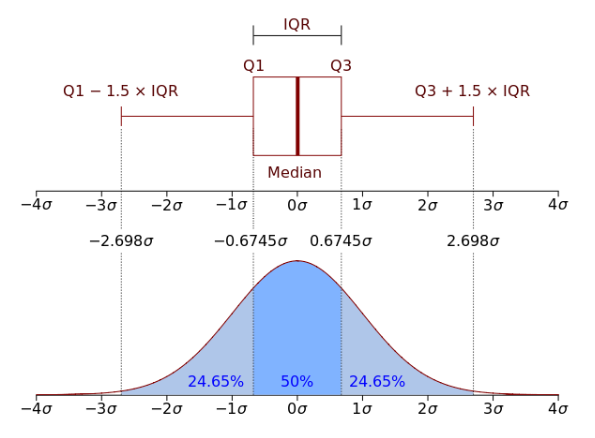


#### 분포 확인

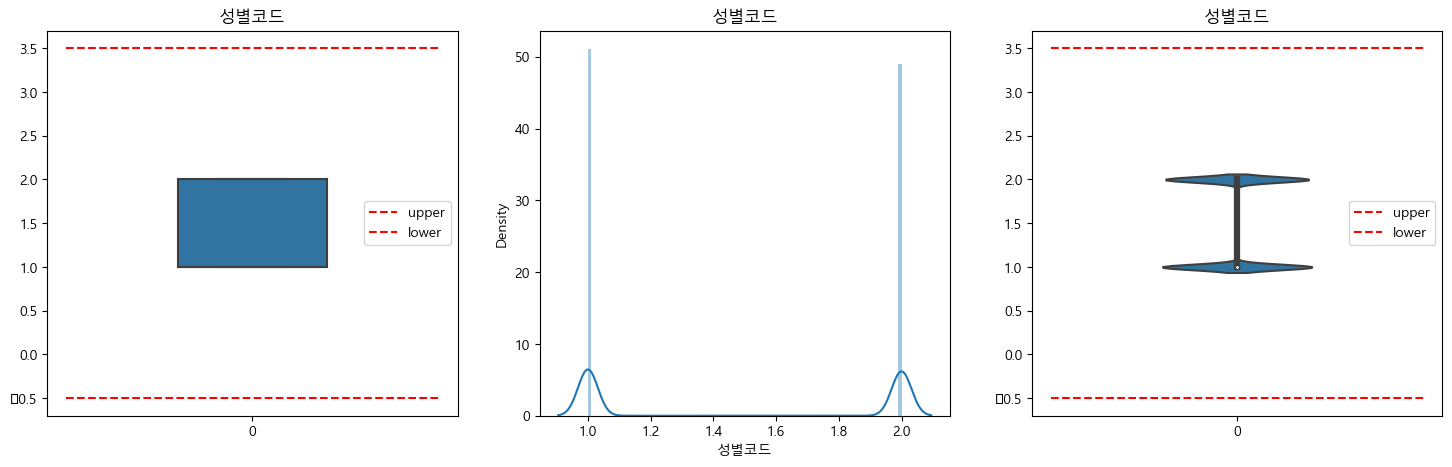

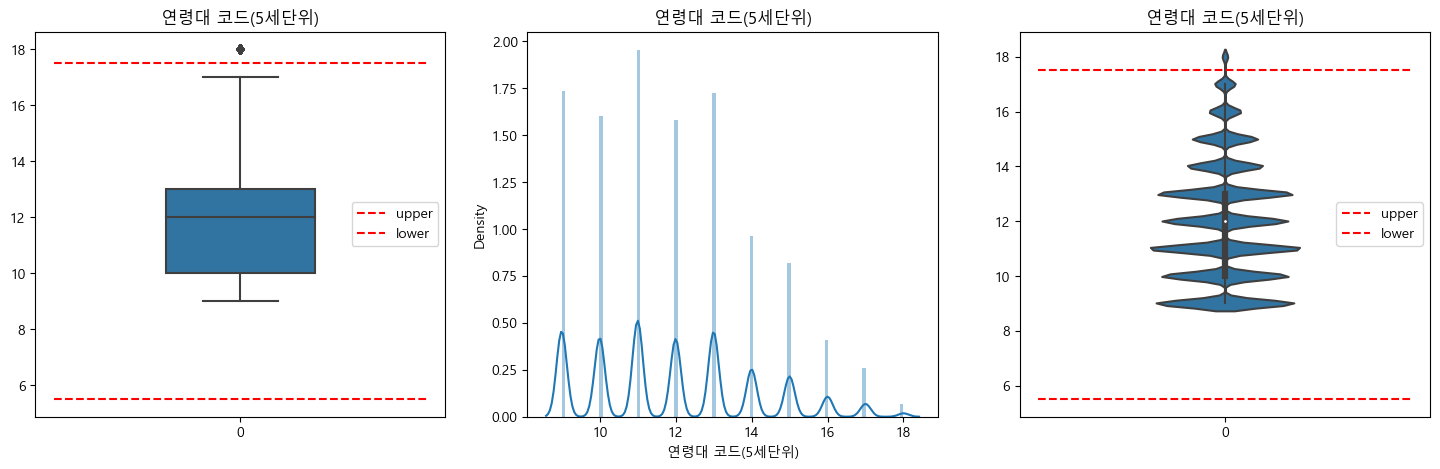

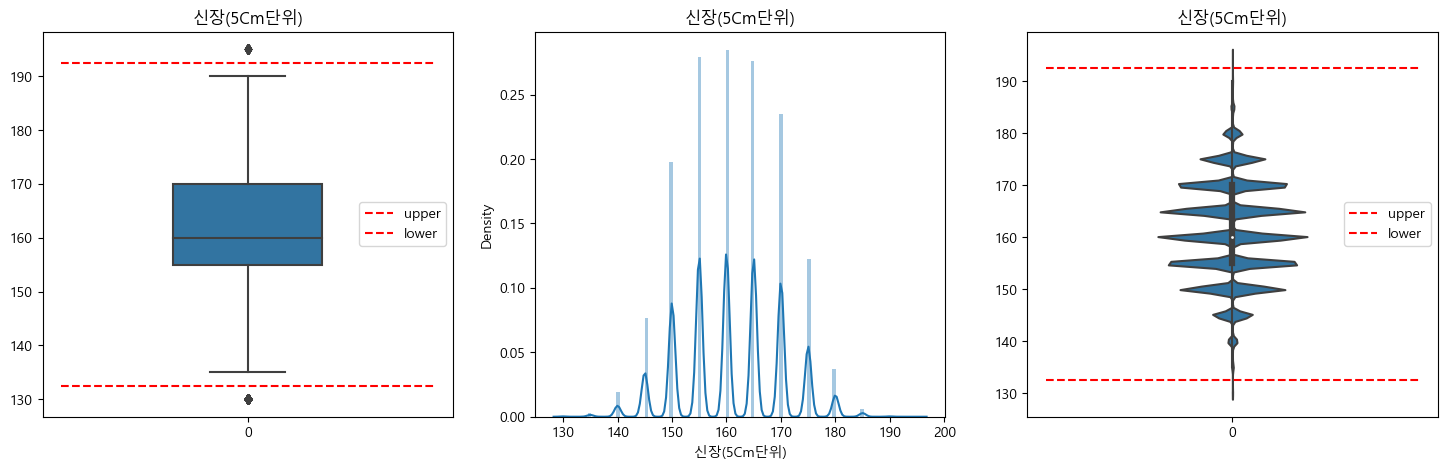

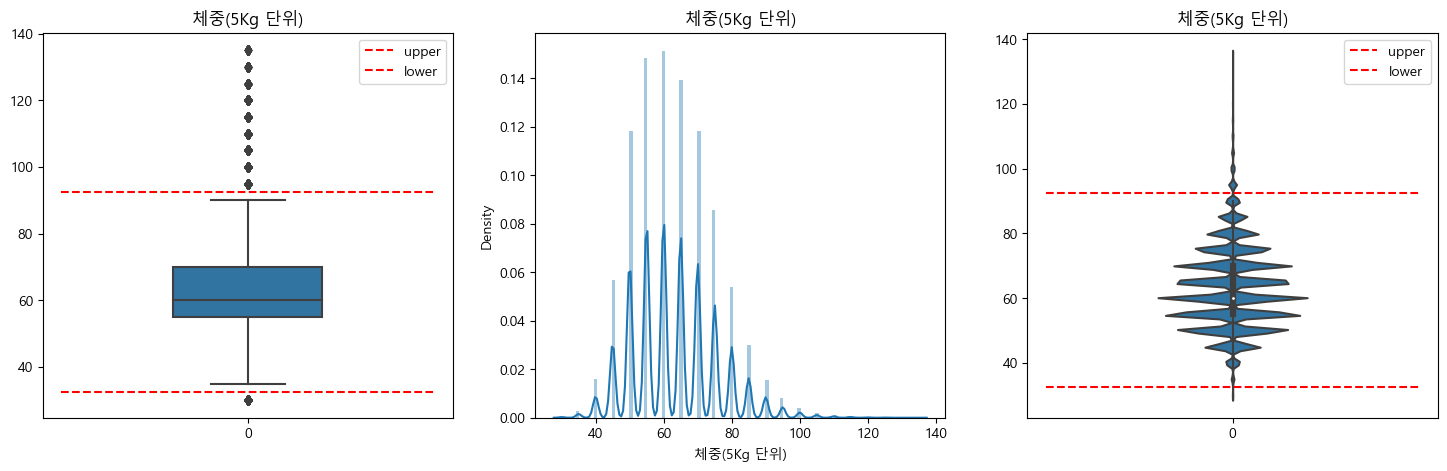

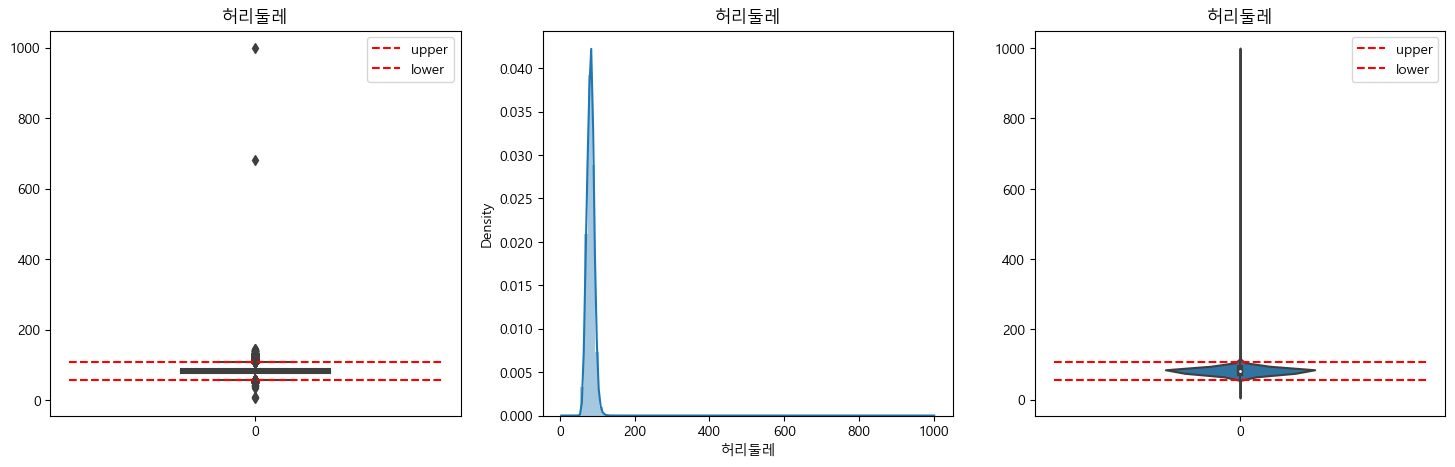

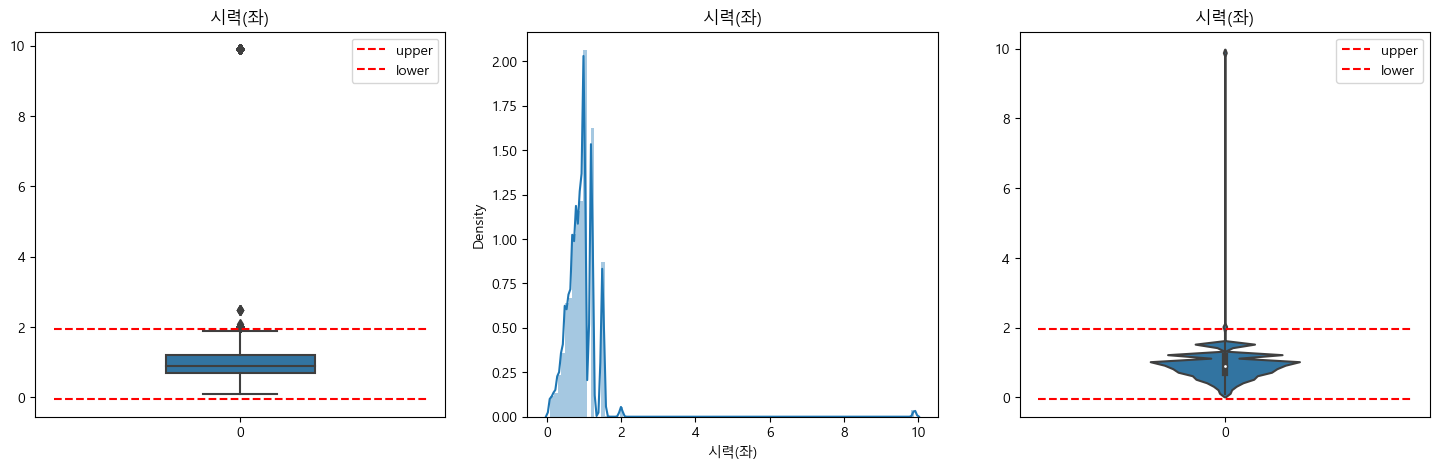

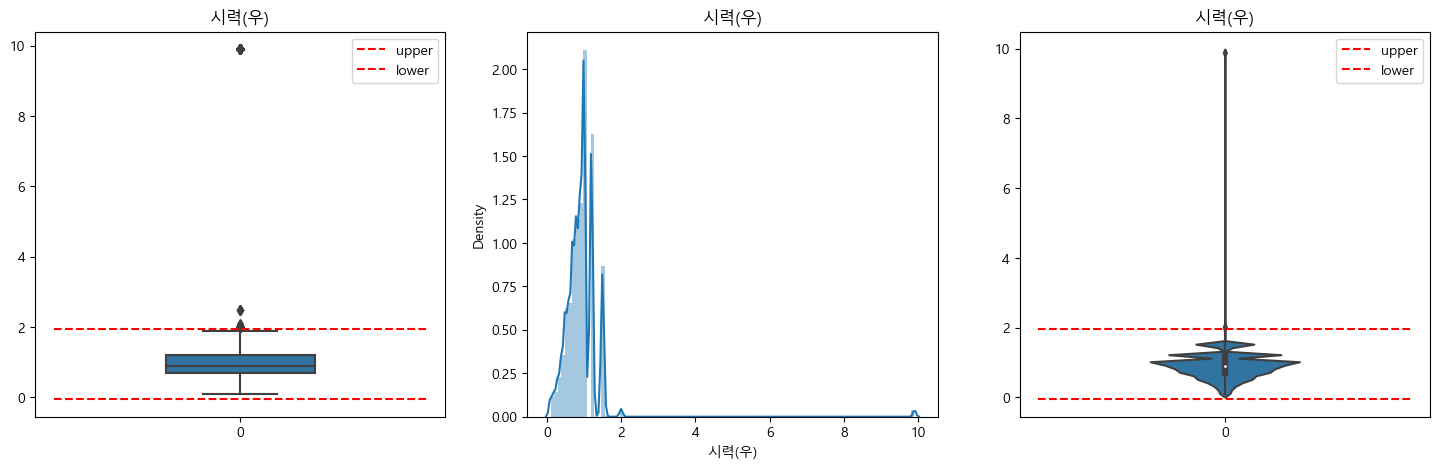

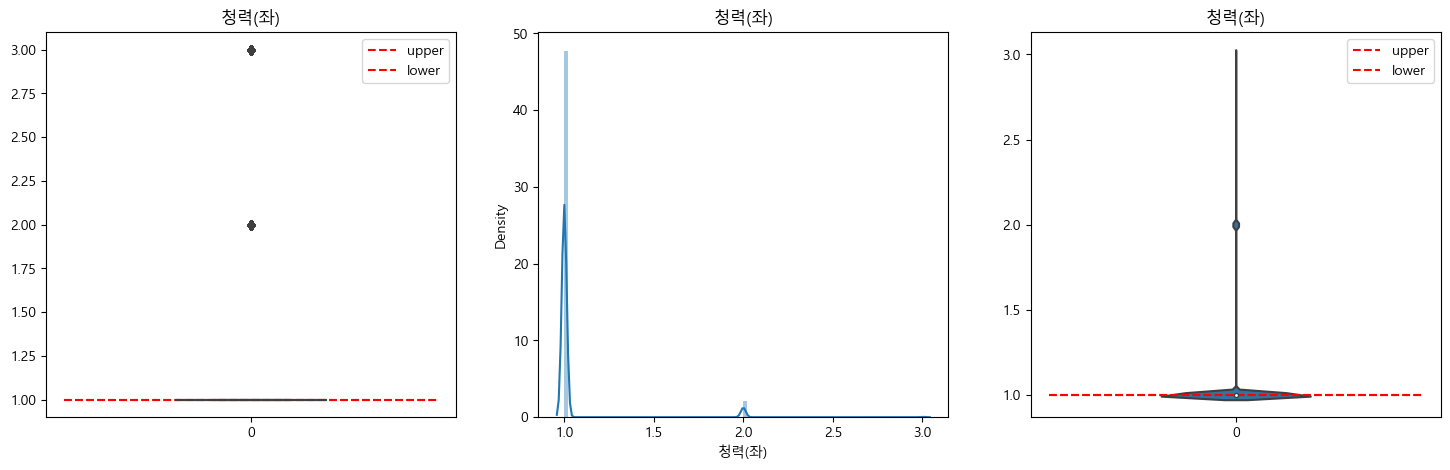

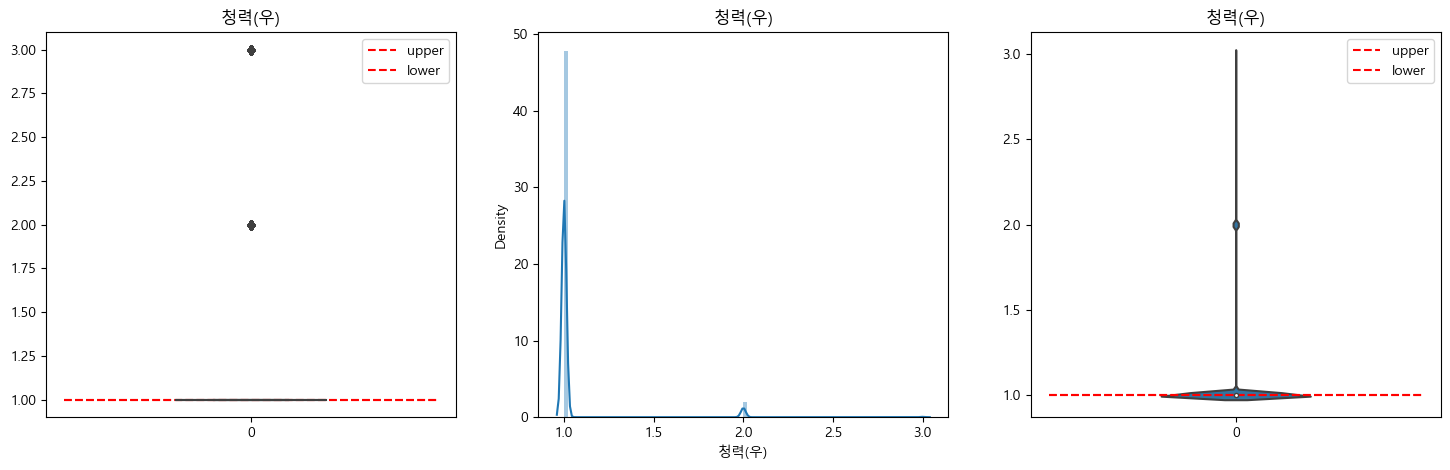

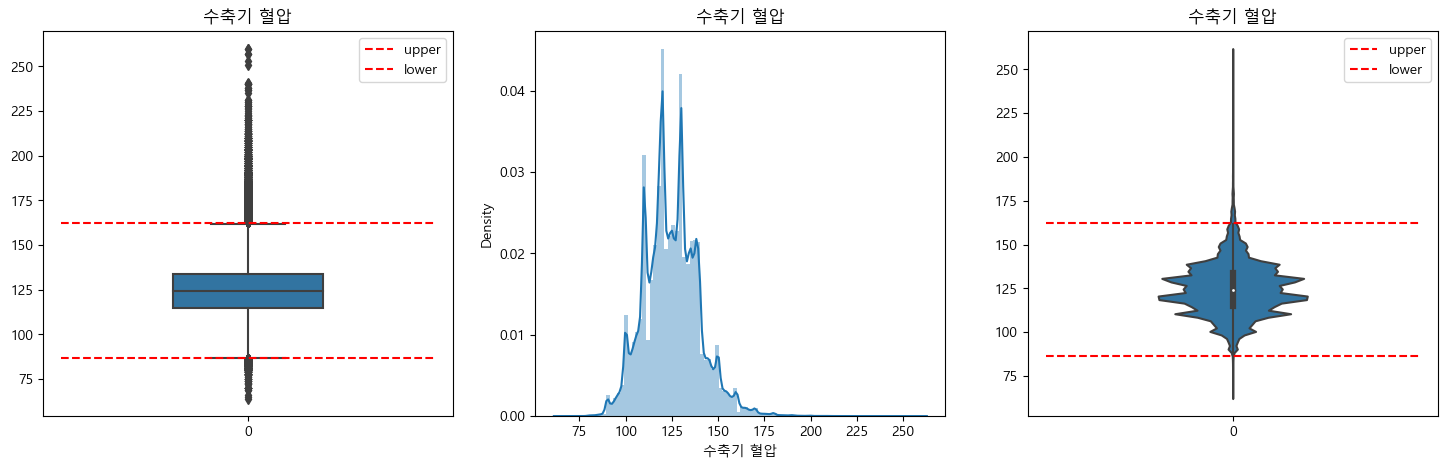

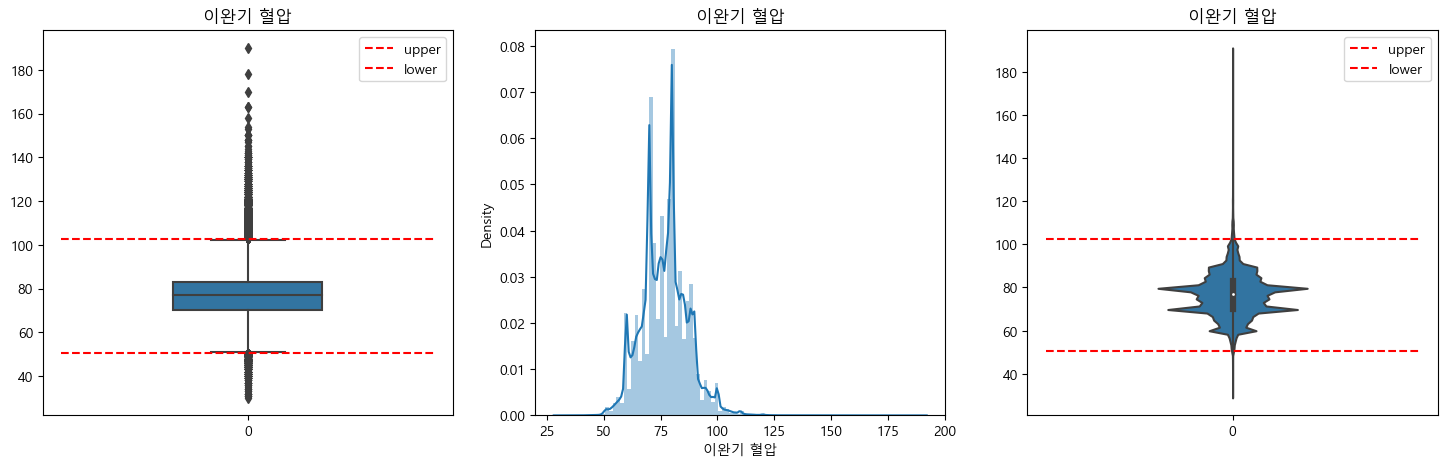

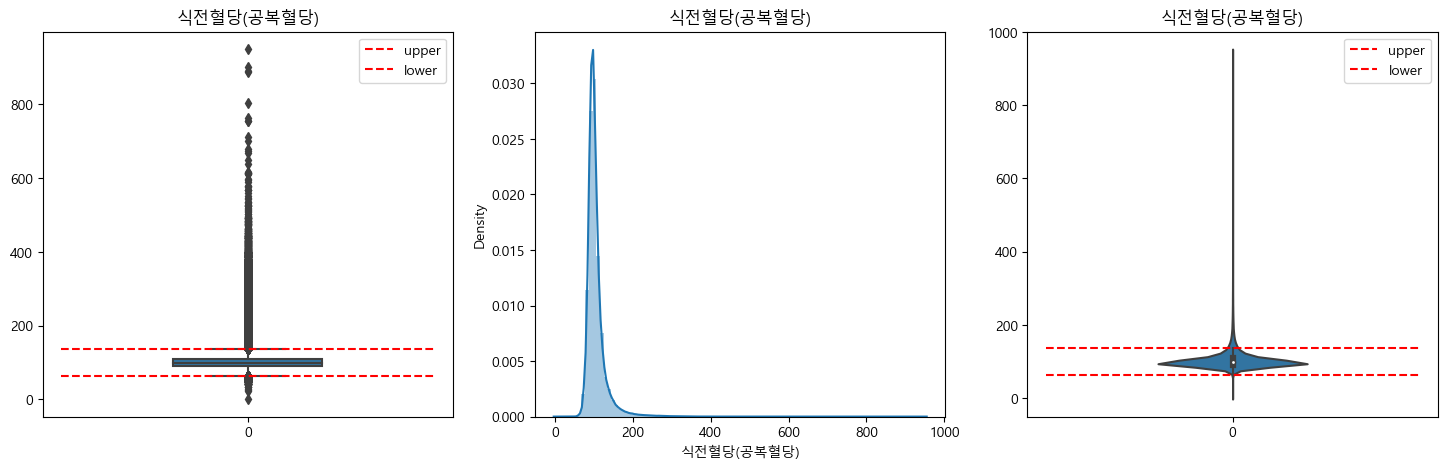

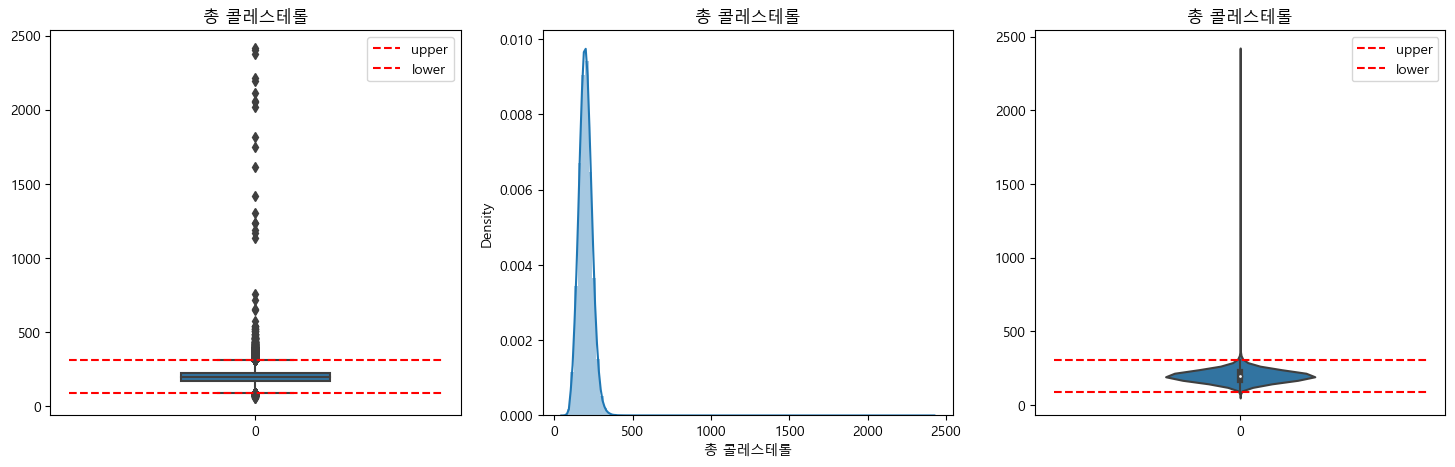

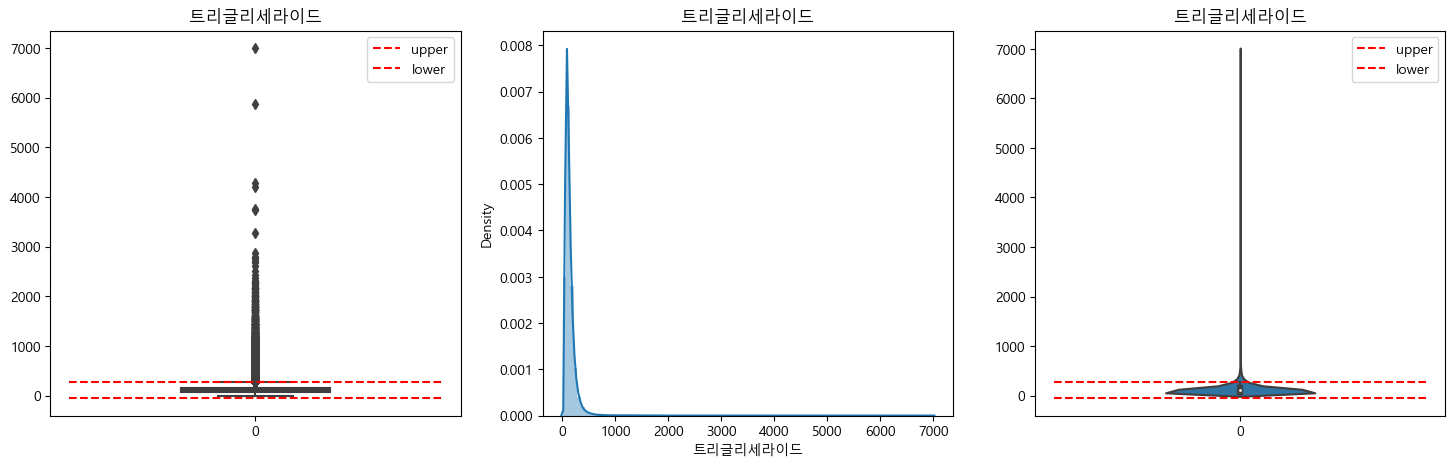

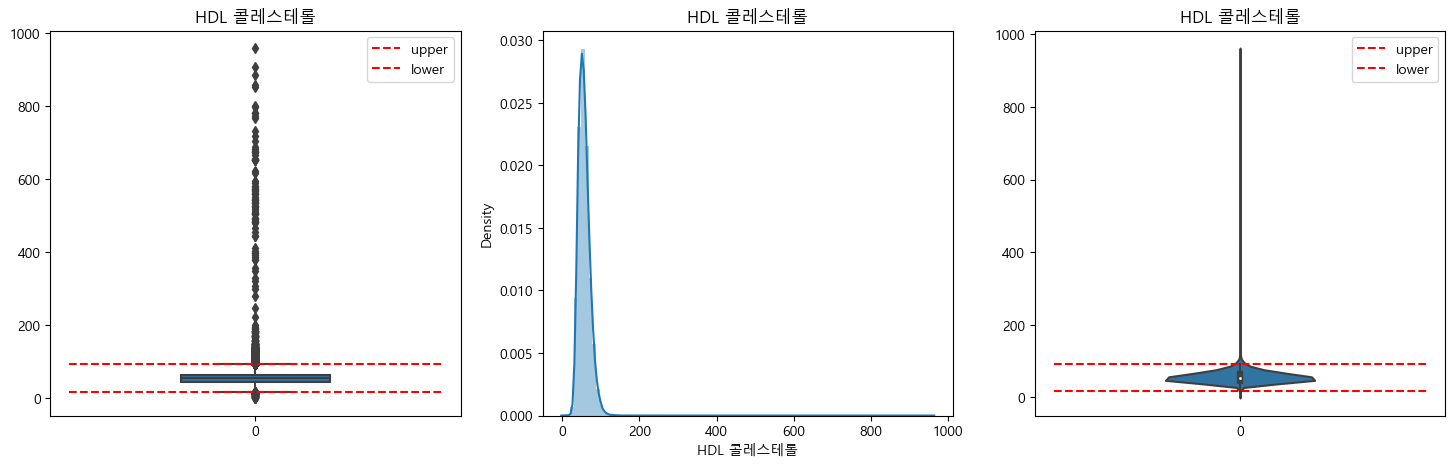

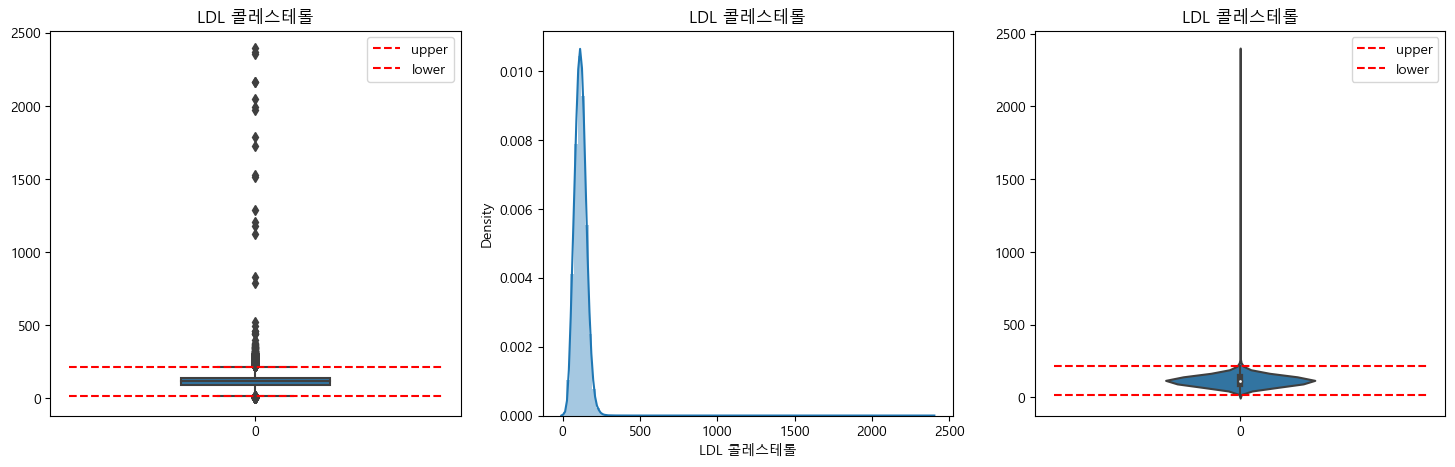

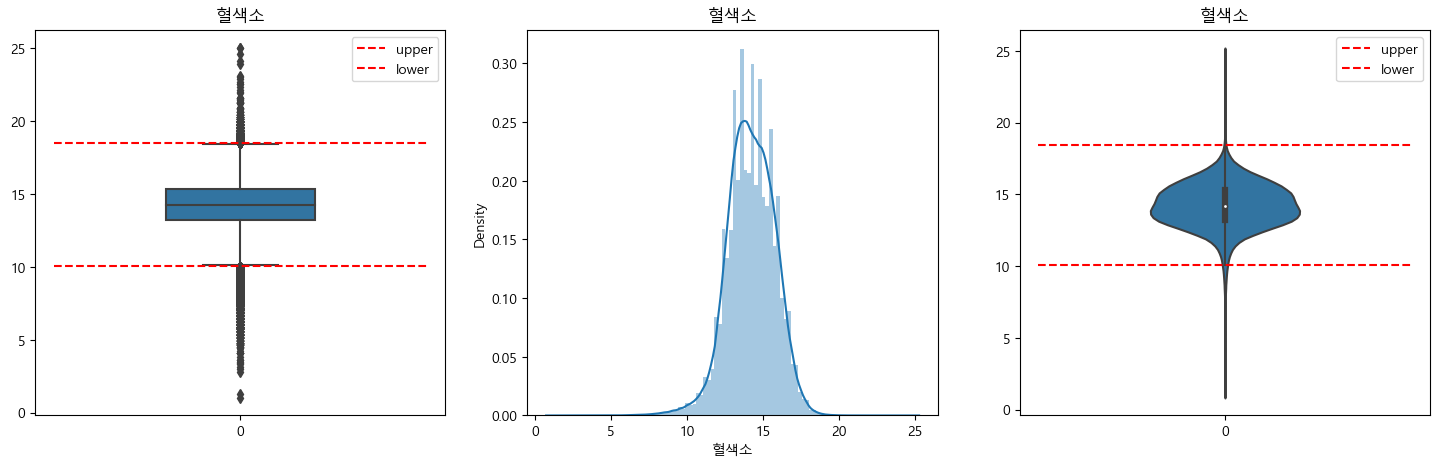

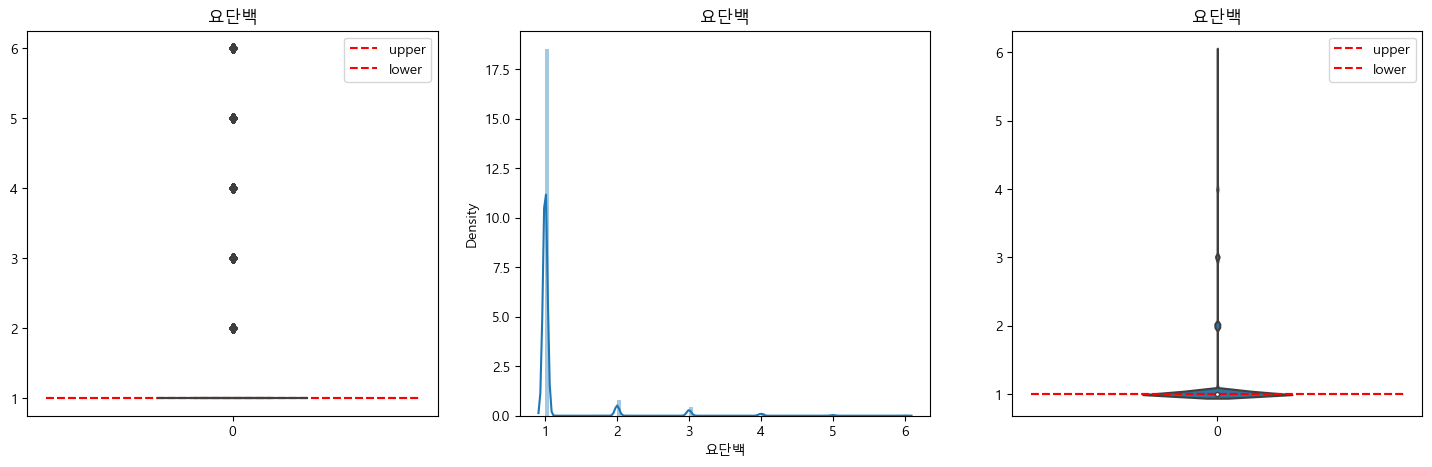

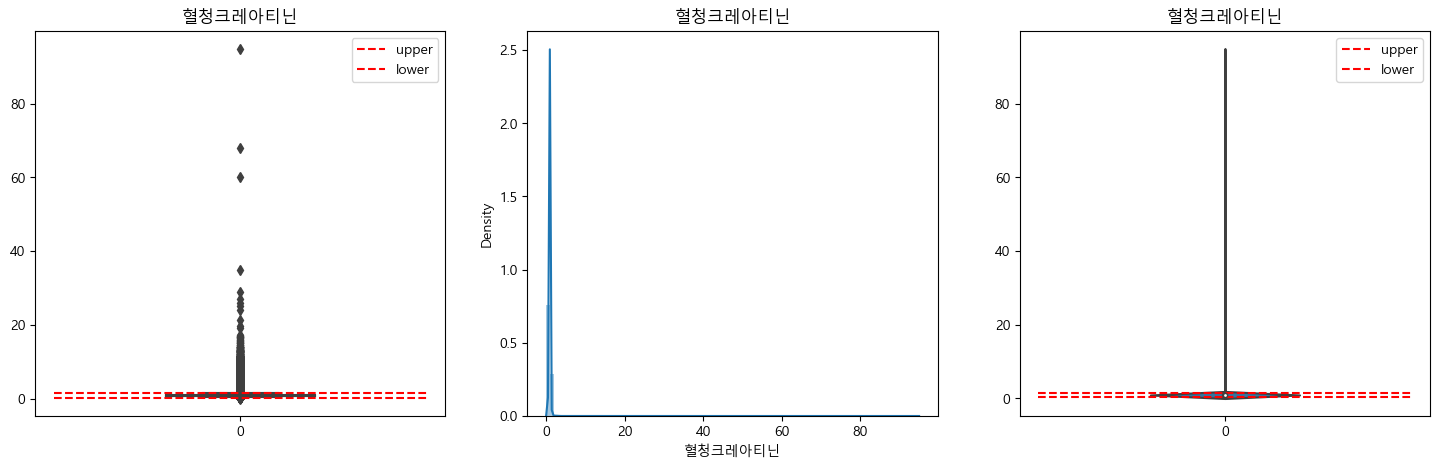

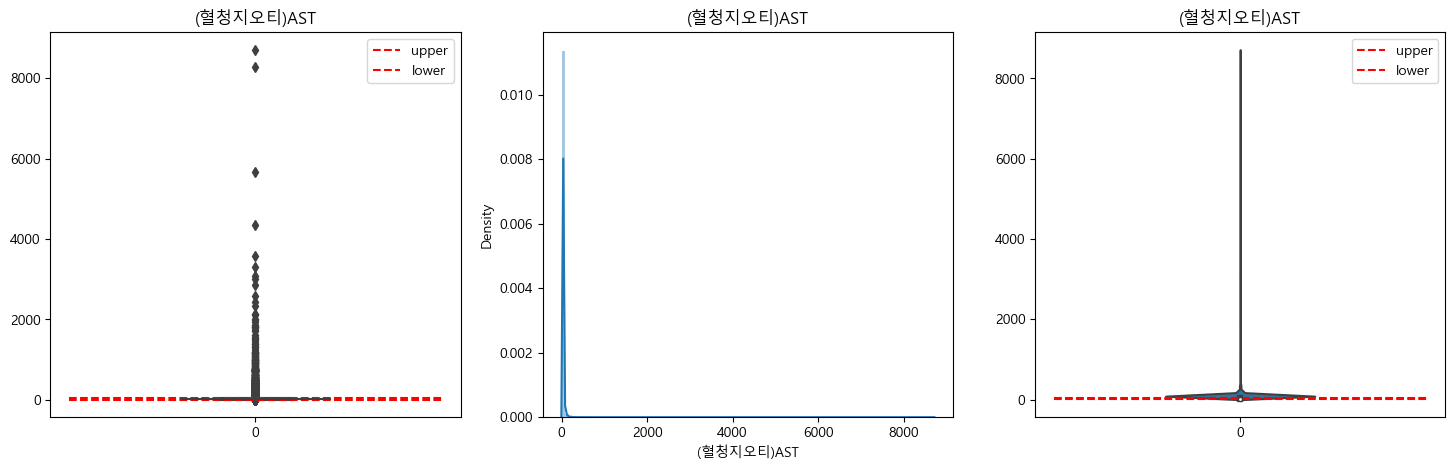

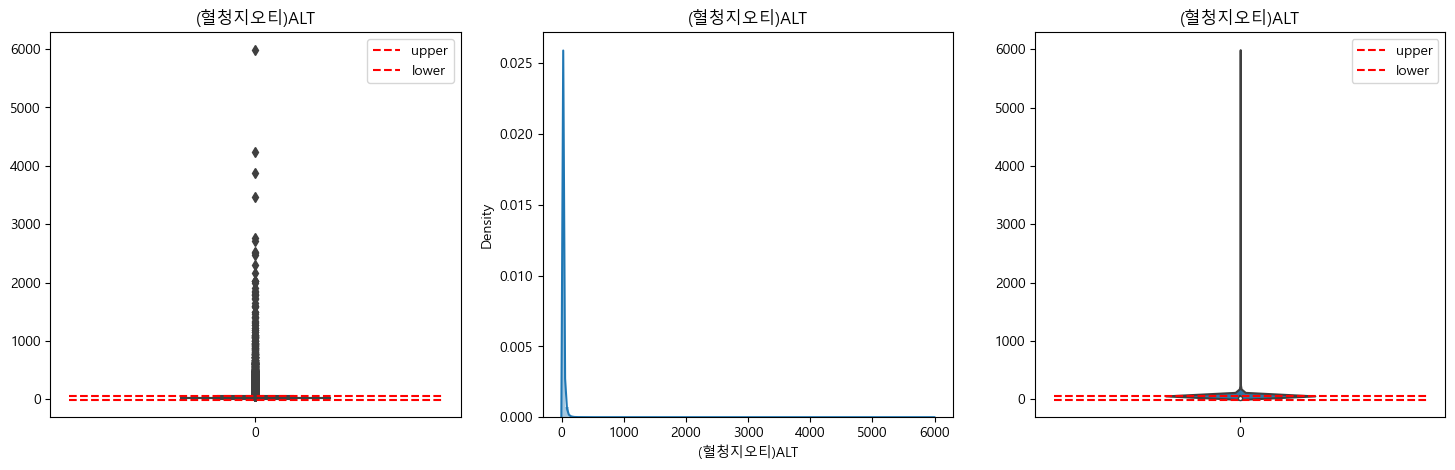

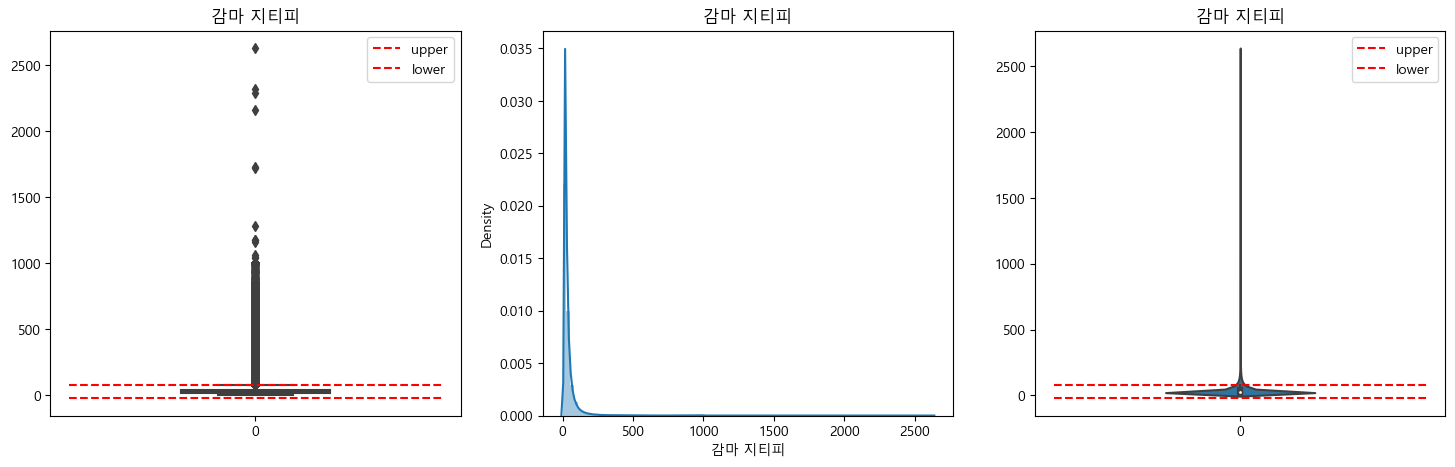

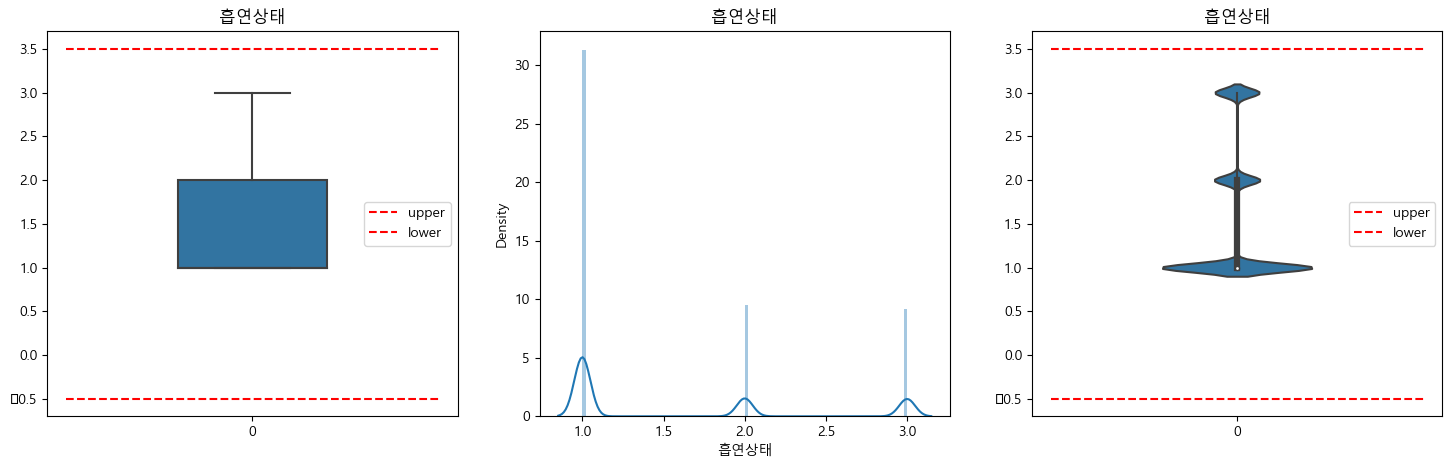

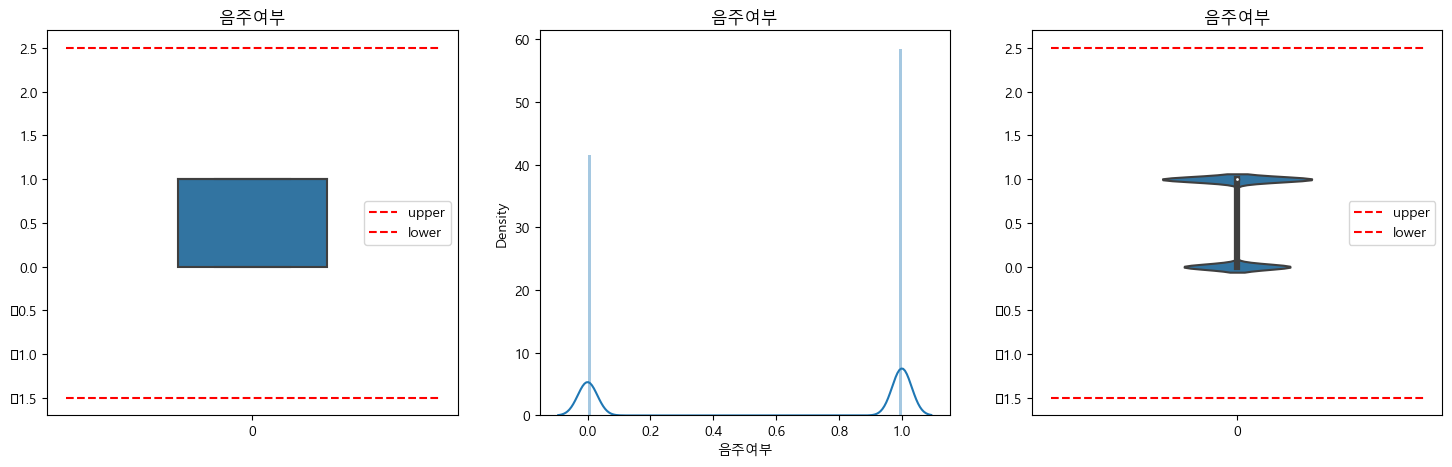

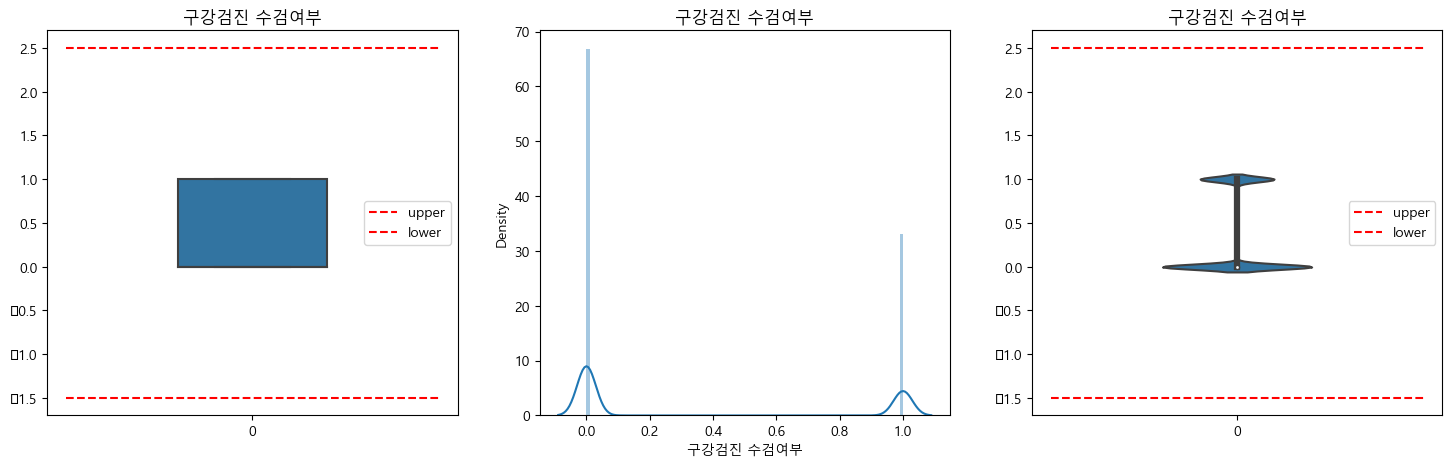

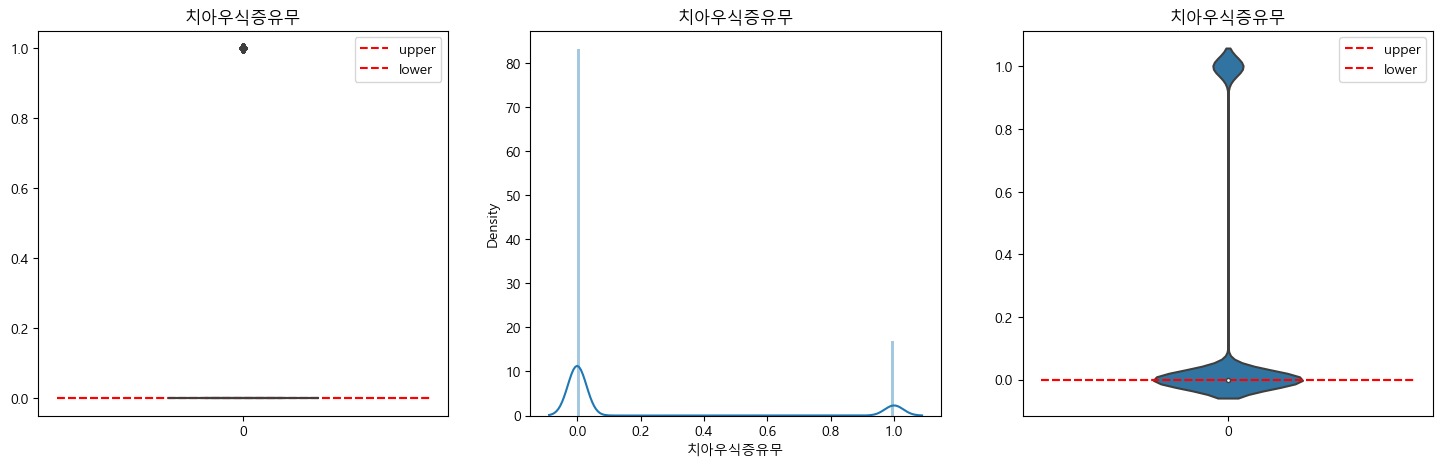

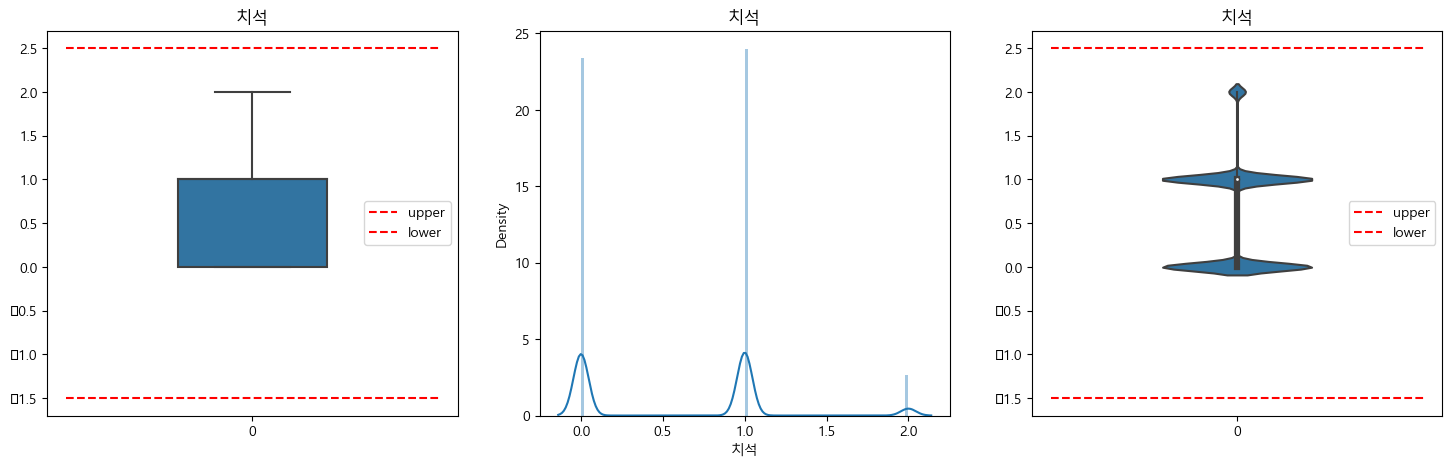

In [11]:
for col in df.columns:
    iqr = df[col].quantile(.75)-df[col].quantile(.25)
    u = df[col].quantile(.75) + 1.5*iqr
    l = df[col].quantile(.25) - 1.5*iqr

    plt.figure(figsize=(18,5))
    plt.title(col)
    plt.subplot(1,3,1)
    sns.boxplot(df[col])
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.title(col)

    plt.subplot(1,3,2)
    sns.distplot(df[col], bins = 100) 
    plt.title(col)

    plt.subplot(1,3,3)
    sns.violinplot(df[col]) 
    plt.title(col)
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.savefig('./res/feature_distribution/'+col+'.png')
    plt.show()

#### 이상치가 있는 컬럼
- 청력 (정상1, 비정상2 이외의 값 없애기)
#### 1.5IQR 벗어나는 값 제거(약 2.7시그마)
- 시력
- 수축기 혈압
- 이완기 혈압
- 식전혈당
- 총콜레스테롤
- 트리글리세라이드
- HDL 콜레스테롤
- LDL 콜레스테롤 
- 혈색소
- 요단백
- 혈청크레아티닌
- 혈청지오티AST
- 혈청지오티ALT
- 감마 지피티

In [10]:
outlier_list = ['체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)','식전혈당(공복혈당)', '총 콜레스테롤',
       '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '혈청크레아티닌',
       '(혈청지오티)AST','감마 지티피']

In [11]:
for col in outlier_list:
    iqr = df1[col].quantile(.75)-df1[col].quantile(.25)
    u = df1[col].quantile(.75) + 1.5*iqr
    l = df1[col].quantile(.25) - 1.5*iqr
    idx = df1[(df1[col] > u) | (df1[col] < l)].index
    df1 = df1.drop(index = idx)
df1 = df1.reset_index(drop = True)

In [12]:
df1 = df1.drop( index = df1[(df1['청력(우)'] > 2) | (df1['청력(좌)'] > 2)].index)

## 분포 재확인

In [13]:
# for col in df1.columns:
#     plt.figure(figsize=(18,5))
#     plt.title(col)

#     plt.subplot(1,3,1)
#     sns.boxplot(df1[col])
#     plt.title(col)

#     plt.subplot(1,3,2)
#     sns.distplot(df1[col], bins = 100) 
#     plt.title(col)
#     plt.subplot(1,3,3)
#     sns.violinplot(df1[col]) 
#     plt.title(col)
#     plt.show()

# 상관계수 확인
#### 다중공선성 문제 생길 수 있음을 파악

<AxesSubplot: >

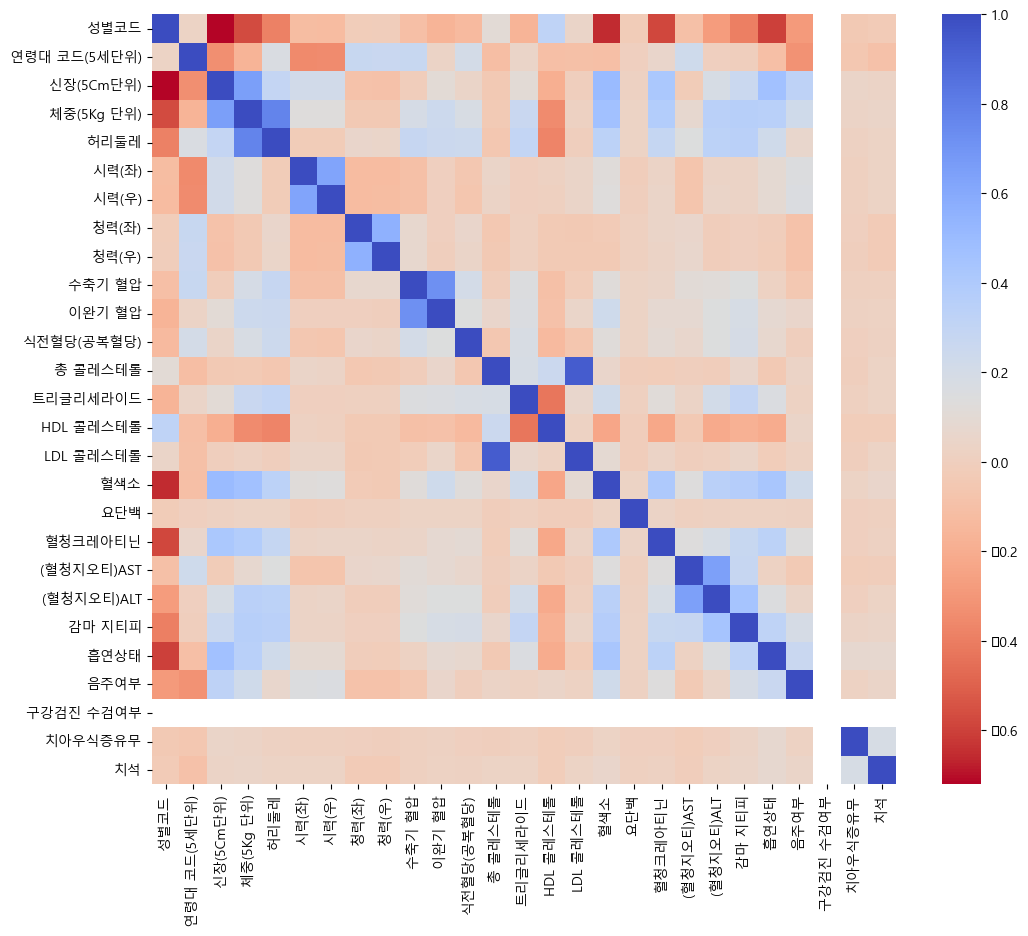

In [14]:
corr = df1.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})


# OLS 검정

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sqrt
import random
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [68]:
X = df1.drop(columns = ['(혈청지오티)ALT'])
y = df1['(혈청지오티)ALT']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42)


# 아웃라이어 제거했으므로 Robust가 아닌 MinMax 선택
scaler = MinMaxScaler()

for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))


model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.991e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        11:25:32   Log-Likelihood:                      1.0584e+05
No. Observations:               63676   AIC:                                 -2.116e+05
Df Residuals:                   63651   BIC:                                 -2.114e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
성별코드            -0.0090      0.001    -13.141      0.000      -0.010      -0.008
연령대 코드(5세단위)    -0.0474      0.001    -44.878      0.000      -0.050      -0.045
신장(5Cm단위)       -0.0377      0.002    -16.020      0.000      -0.042      -0.033
체중(5Kg 단위)       0.0520      0.002     23.908      0.000       0.048       0.056
허리둘레             0.0167      0.002      8.578      0.000       0.013       0.021
시력(좌)            0.0022      0.002      1.419      0.156      -0.001       0.005
시력(우)            0.0021      0.001      2.123      0.034       0.000       0.004
청력(좌)           -0.0018      0.001     -1.834      0.067      -0.004       0.000
청력(우)           -0.0029      0.001     -3.001      0.003      -0.005      -0.001
수축기 혈압          -0.0009      0.003     -0.304      0.761      -0.007       0.005
이완기 혈압          -0.0112      0.003     -3.939      0.000      -0.017      -0.006
식전혈당(공복혈당)       0.0188      0.001     16.819      0.000       0.017       0.021
총 콜레스테롤         -0.0333      0.008     -4.308      0.000      -0.048      -0.018
트리글리세라이드         0.0246      0.002     11.820      0.000       0.021       0.029
HDL 콜레스테롤       -0.0156      0.003     -5.934      0.000      -0.021      -0.010
LDL 콜레스테롤        0.0208      0.007      3.022      0.003       0.007       0.034
혈색소              0.0503      0.002     33.484      0.000       0.047       0.053
요단백              0.0024      0.002      1.022      0.307      -0.002       0.007
혈청크레아티닌         -0.0249      0.001    -19.424      0.000      -0.027      -0.022
(혈청지오티)AST       0.2489      0.001    215.259      0.000       0.247       0.251
감마 지티피           0.0626      0.001     55.447      0.000       0.060       0.065
흡연상태            -0.0075      0.001    -11.750      0.000      -0.009      -0.006
음주여부            -0.0084      0.000    -20.244      0.000      -0.009      -0.008
구강검진 수검여부      1.02e-18   9.19e-20     11.099      0.000     8.4e-19     1.2e-18
치아우식증유무         -0.0020      0.001     -4.007      0.000      -0.003      -0.001
치석               0.0013      0.001      2.031      0.042    4.51e-05       0.003
==============================================================================
Omnibus:                    18322.672   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127176.032
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       9.490   Cond. No.                     1.42e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of t

# 해석
### 1) 회귀모형은 타당한가?
- H0 귀무가설: 회귀모형은 타당하지 않다.
- H1 대립가설: 회귀모형은 타당하다
#### 결과
- Prob(F-statistics) = 0.000
- 유의확률이 0.000이므로 유의수준 0.05에서 회귀모형은 통계적으로 유의하게 타당한 것으로 나타났다.

### 2) X는 Y에게 유의한 영향을 주는가?
- 귀무가설: X는 Y에게 영향을 주지 않는다.
- 대립가설: X는 Y에게 영향을 준다.

#### 결과
- ***시력(좌), 청력(좌), 수축기 혈압, 요단백*** 의 target에 대한 영향은 통계적으로 유의하지 않다. (영향을 주는지 안주는지 모른다) $$귀무가설 채택$$
- ***이외의 변수에 대한 회귀계수*** 는 유의수준 0.05에서 통계적으로 유의하다. $$귀무가설 기각$$
- 회귀 계수의 값이 큰 변수들은 Y에게 많은 영향을 준다.
- 회귀 계수의 값이 작은 변수들은 Y에게 적은 영향을 준다.

In [64]:
columns = ['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', 
       '시력(우)', '청력(우)', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤',
       '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '혈청크레아티닌',
       '(혈청지오티)AST', '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석']

In [65]:
X = df1.drop(columns = ['(혈청지오티)ALT','시력(좌)','청력(좌)','수축기 혈압','요단백'])
y = df1['(혈청지오티)ALT']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42)

scaler = MinMaxScaler()

for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))


model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.560e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        11:14:30   Log-Likelihood:                      1.0584e+05
No. Observations:               63676   AIC:                                 -2.116e+05
Df Residuals:                   63655   BIC:                                 -2.114e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
성별코드            -0.0089      0.001    -13.087      0.000      -0.010      -0.008
연령대 코드(5세단위)    -0.0479      0.001    -47.203      0.000      -0.050      -0.046
신장(5Cm단위)       -0.0375      0.002    -15.985      0.000      -0.042      -0.033
체중(5Kg 단위)       0.0520      0.002     23.978      0.000       0.048       0.056
허리둘레             0.0166      0.002      8.530      0.000       0.013       0.020
시력(우)            0.0029      0.001      3.647      0.000       0.001       0.005
청력(우)           -0.0039      0.001     -4.705      0.000      -0.006      -0.002
이완기 혈압          -0.0117      0.002     -5.925      0.000      -0.016      -0.008
식전혈당(공복혈당)       0.0188      0.001     16.861      0.000       0.017       0.021
총 콜레스테롤         -0.0346      0.008     -4.518      0.000      -0.050      -0.020
트리글리세라이드         0.0250      0.002     12.103      0.000       0.021       0.029
HDL 콜레스테롤       -0.0151      0.003     -5.815      0.000      -0.020      -0.010
LDL 콜레스테롤        0.0220      0.007      3.226      0.001       0.009       0.035
혈색소              0.0504      0.002     33.582      0.000       0.047       0.053
혈청크레아티닌         -0.0248      0.001    -19.441      0.000      -0.027      -0.022
(혈청지오티)AST       0.2489      0.001    215.293      0.000       0.247       0.251
감마 지티피           0.0626      0.001     55.431      0.000       0.060       0.065
흡연상태            -0.0075      0.001    -11.750      0.000      -0.009      -0.006
음주여부            -0.0084      0.000    -20.229      0.000      -0.009      -0.008
구강검진 수검여부    -2.114e-16    1.9e-18   -111.063      0.000   -2.15e-16   -2.08e-16
치아우식증유무         -0.0020      0.001     -4.034      0.000      -0.003      -0.001
치석               0.0013      0.001      2.060      0.039    6.42e-05       0.003
==============================================================================
Omnibus:                    18318.007   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127061.819
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       9.487   Cond. No.                     2.63e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:  ', mean_squared_error(y_test, model.predict(X_test)))
print('RMSE: ', sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('MAE:  ', mean_absolute_error(y_test, model.predict(X_test)))

MSE:   0.0020761922496797033
RMSE:  0.045565252656818475
MAE:   0.03262631594859256


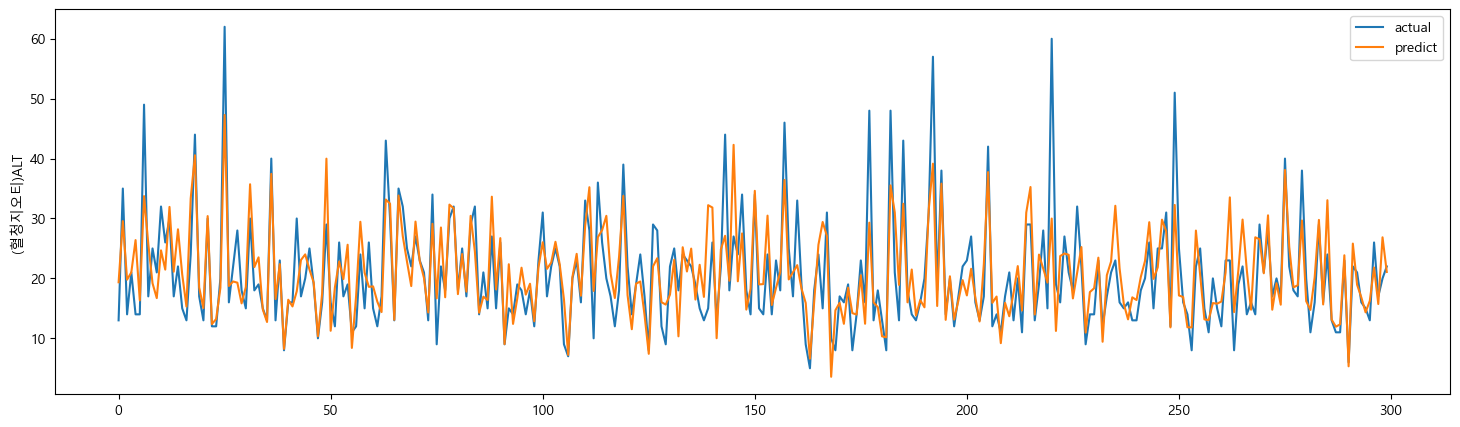

In [67]:
actual = scaler.inverse_transform(y_test)
predict = scaler.inverse_transform(np.array(model.predict(X_test)).reshape(-1,1))
plt.figure(figsize = (18,5))
plt.plot(actual[:300], label = 'actual')
plt.plot(predict[:300], label = 'predict')
plt.ylabel('(혈청지오티)ALT')
plt.legend()
plt.show()

### VIF 계산

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif


,VIF Factor,features
0,4.257253,성별코드
1,2.035440,연령대 코드(5세단위)
2,3.582014,신장(5Cm단위)
3,5.530814,체중(5Kg 단위)
4,3.784030,허리둘레
5,1.724044,시력(좌)
6,1.715148,시력(우)
7,1.500495,청력(좌)
8,1.496514,청력(우)
9,2.454893,수축기 혈압


# 경우의 수 2

### 경우의 수 1에서 드랍해도 되겠다고 판단한 열
1. 치아 관련 변수
- 결측률이 높으며 target에 대한 영향력이 매우 적음
2. 콜레스테롤 관련 변수 (총 콜레스테롤만 남겨 놓음)
- 결측률이 높으며 다중공선성 위배의 위험이 있음

In [98]:
drop_columns =  ['트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤','구강검진 수검여부', '치아우식증유무', '치석']
df2 = df.drop(columns = drop_columns)

In [99]:
df2 = df2.dropna()
df2

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,...,식전혈당(공복혈당),총 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,...,90.0,188.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0
4,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,...,110.0,220.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0
5,1,9,185,85,94.0,1.2,1.2,1.0,1.0,114.0,...,86.0,234.0,16.4,1.0,1.1,25.0,32.0,26.0,3.0,1.0
6,1,9,165,80,93.0,0.8,0.7,1.0,2.0,112.0,...,250.0,119.0,15.7,1.0,0.7,18.0,20.0,35.0,3.0,1.0
8,2,17,150,50,82.0,0.4,0.5,2.0,2.0,136.0,...,104.0,177.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,1,13,175,90,99.5,0.9,0.9,1.0,1.0,120.0,...,98.0,142.0,15.1,1.0,0.8,66.0,58.0,36.0,2.0,1.0
999995,2,13,145,55,81.0,0.9,1.0,1.0,1.0,132.0,...,124.0,178.0,13.6,1.0,0.6,21.0,25.0,18.0,1.0,0.0
999996,2,12,160,55,76.5,1.5,1.5,1.0,1.0,100.0,...,98.0,288.0,14.0,1.0,0.8,21.0,14.0,19.0,1.0,1.0
999998,2,9,160,70,91.0,0.6,0.5,1.0,1.0,137.0,...,111.0,208.0,11.9,1.0,1.0,25.0,29.0,13.0,1.0,0.0


### 이상치 처리
- 2.0IQR Rule 적용

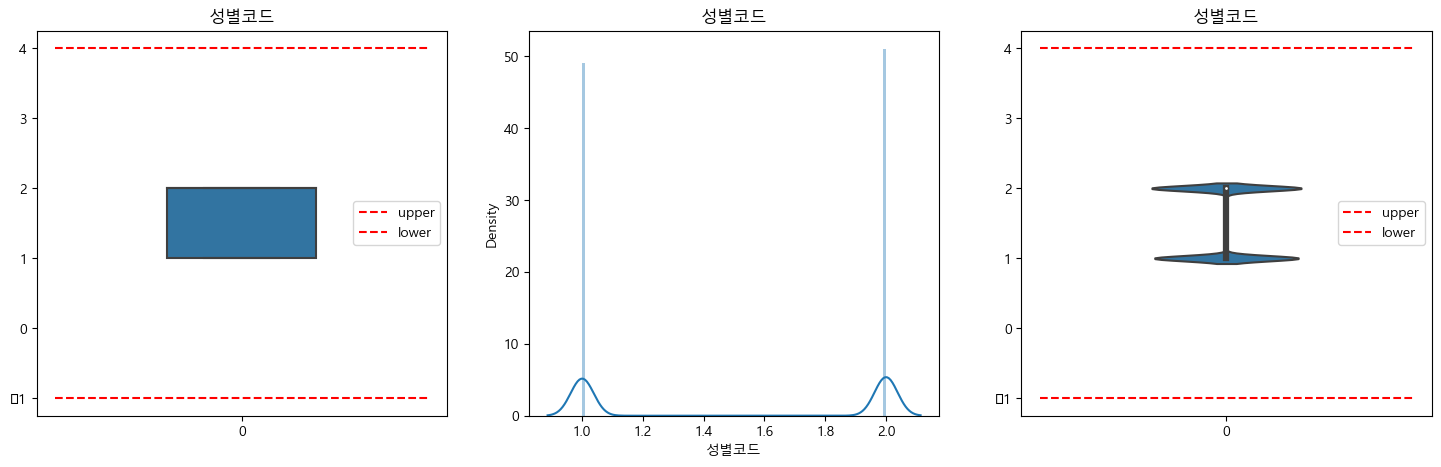

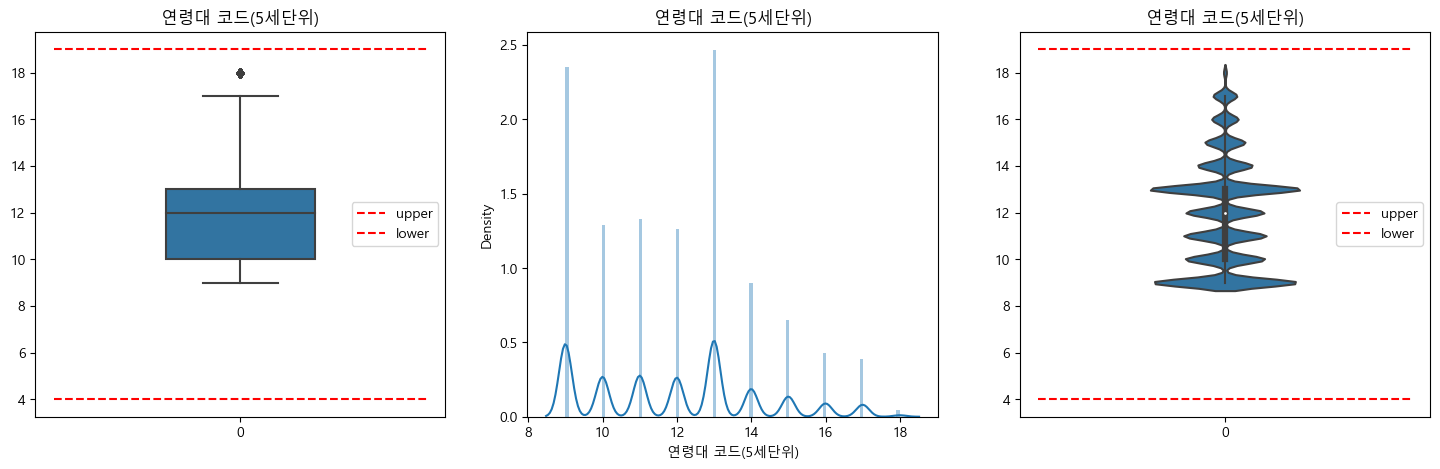

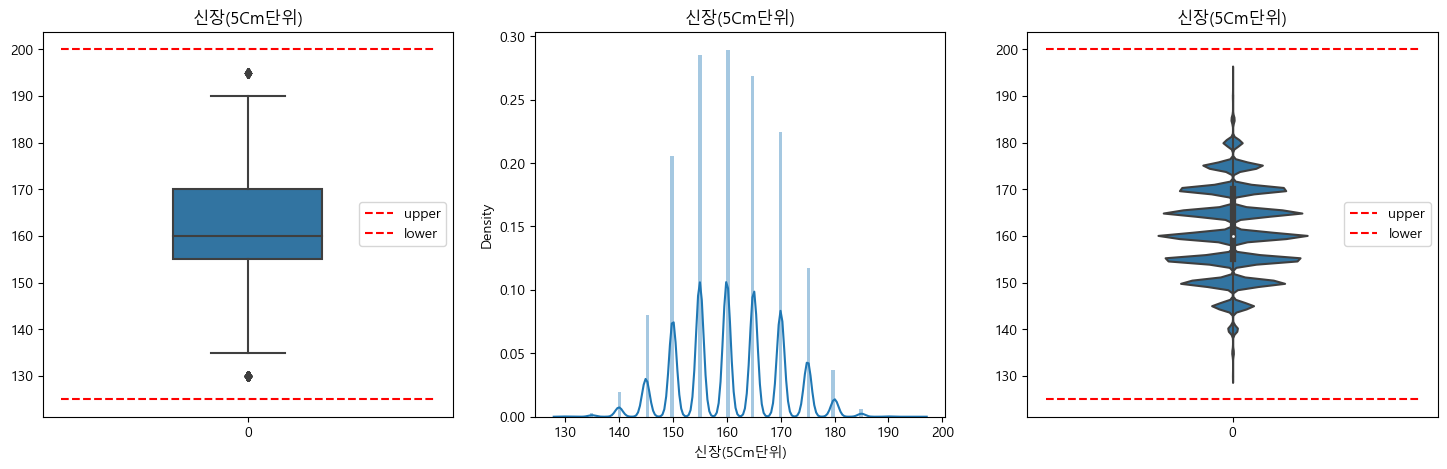

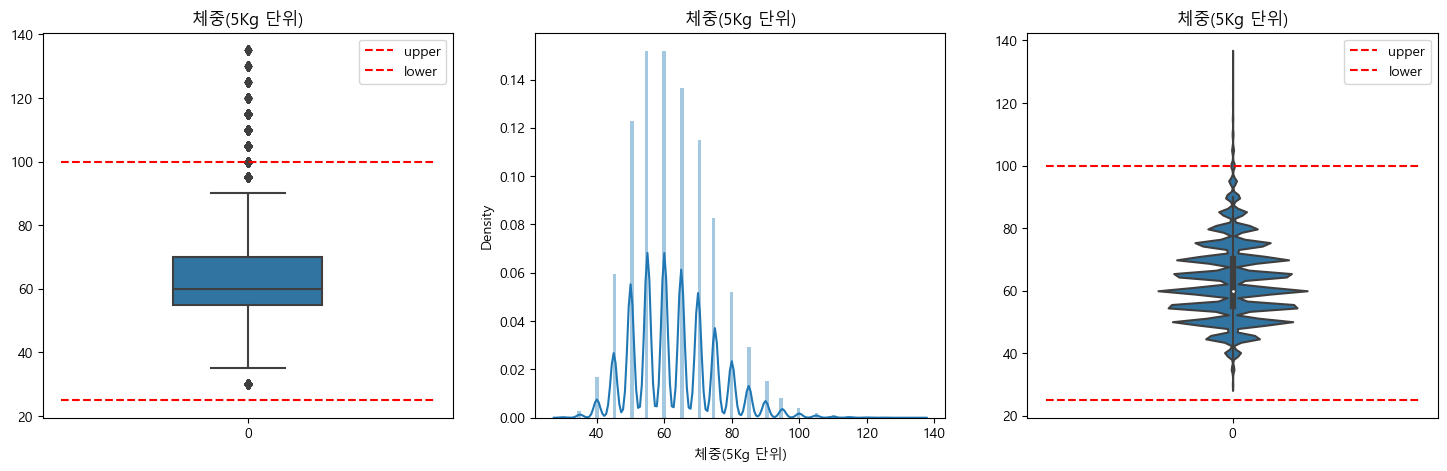

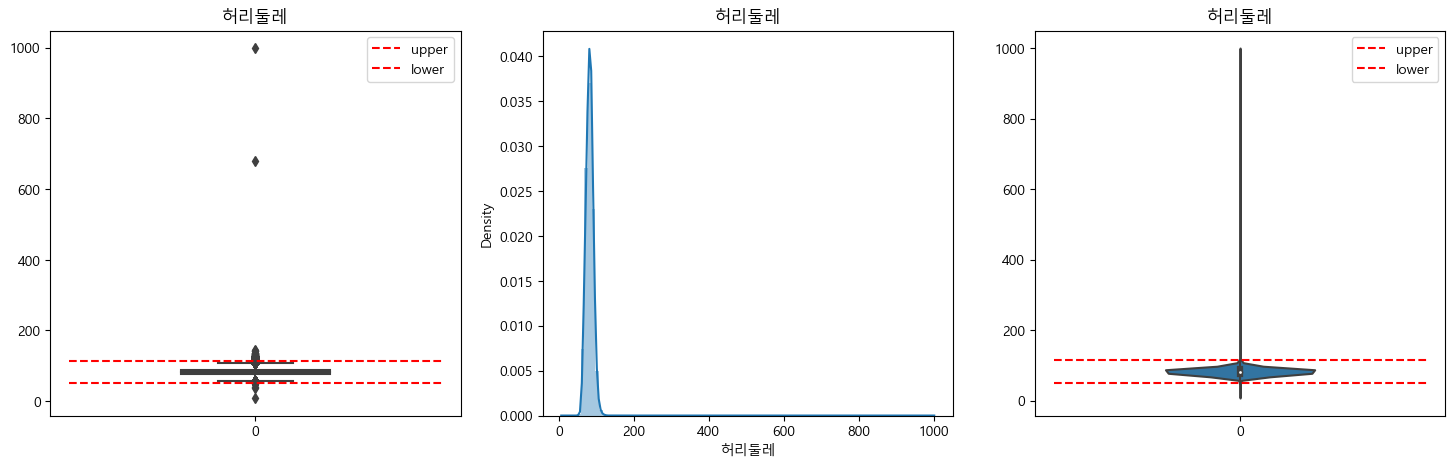

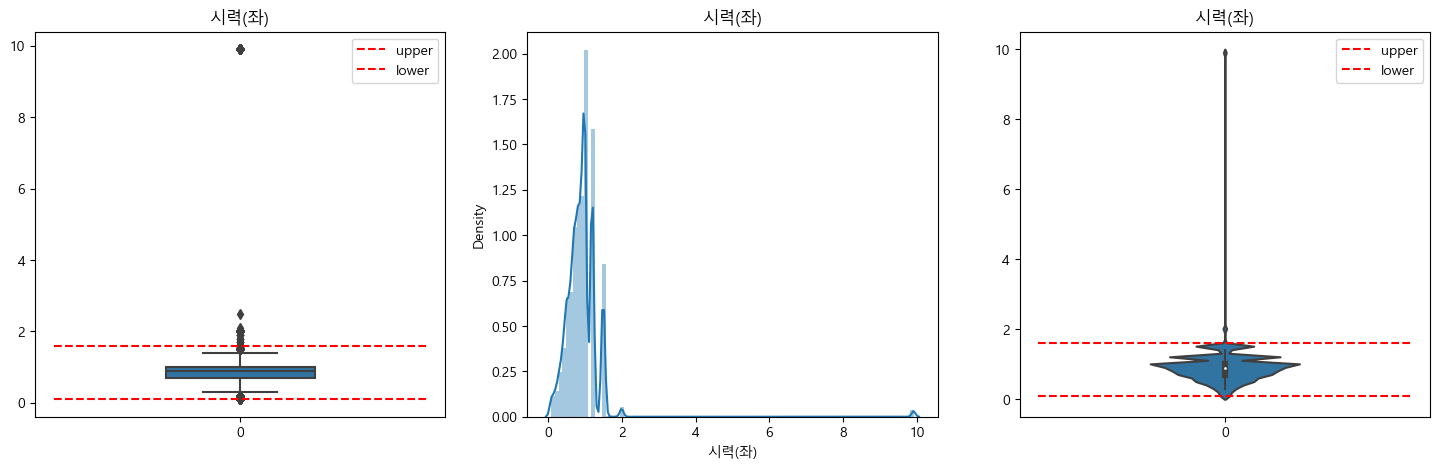

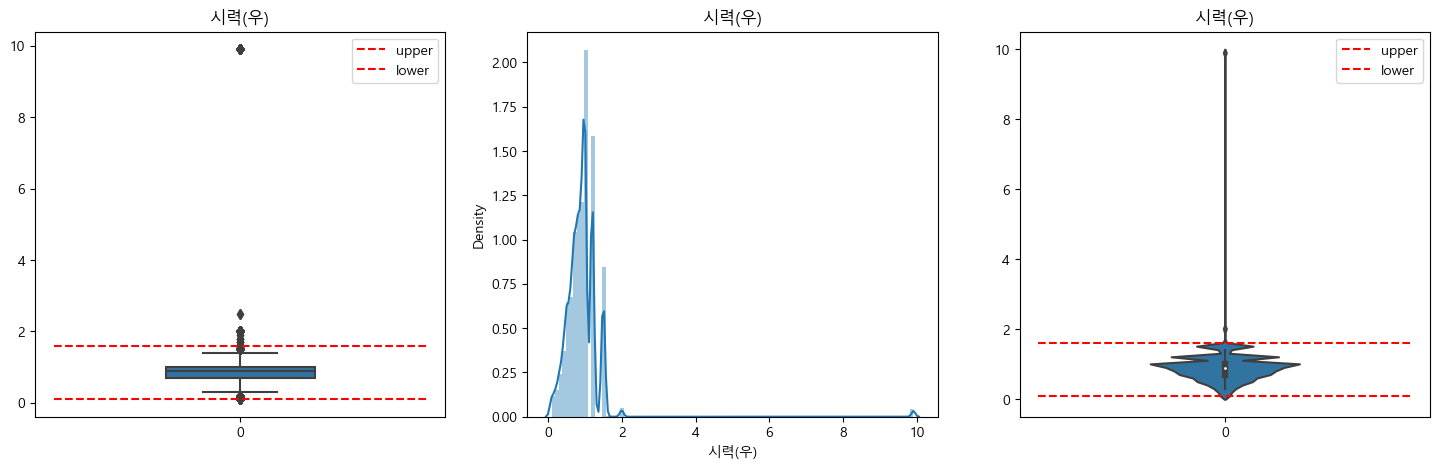

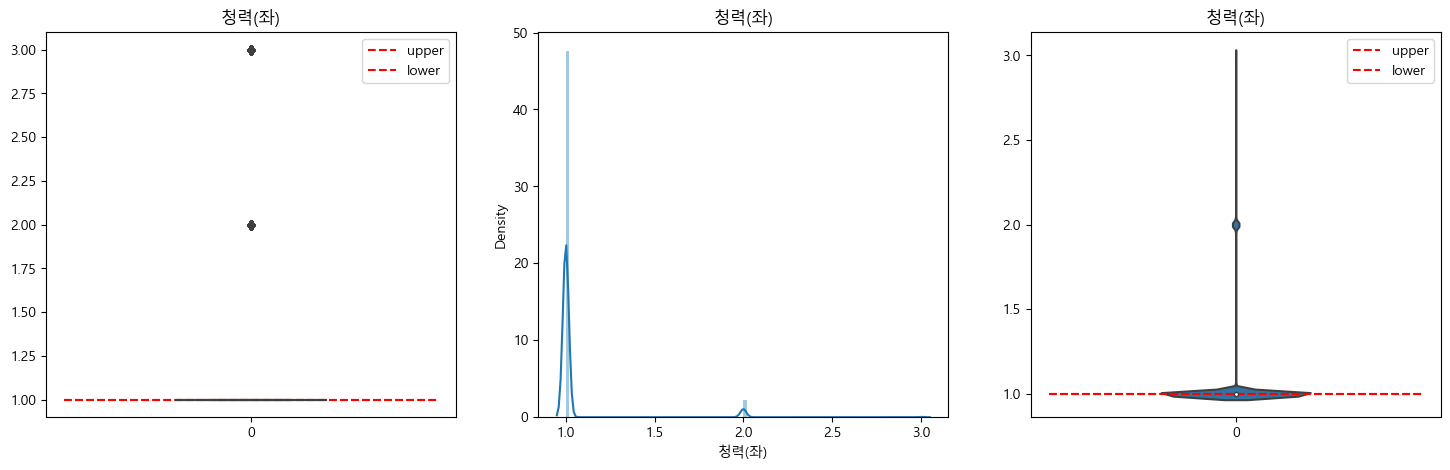

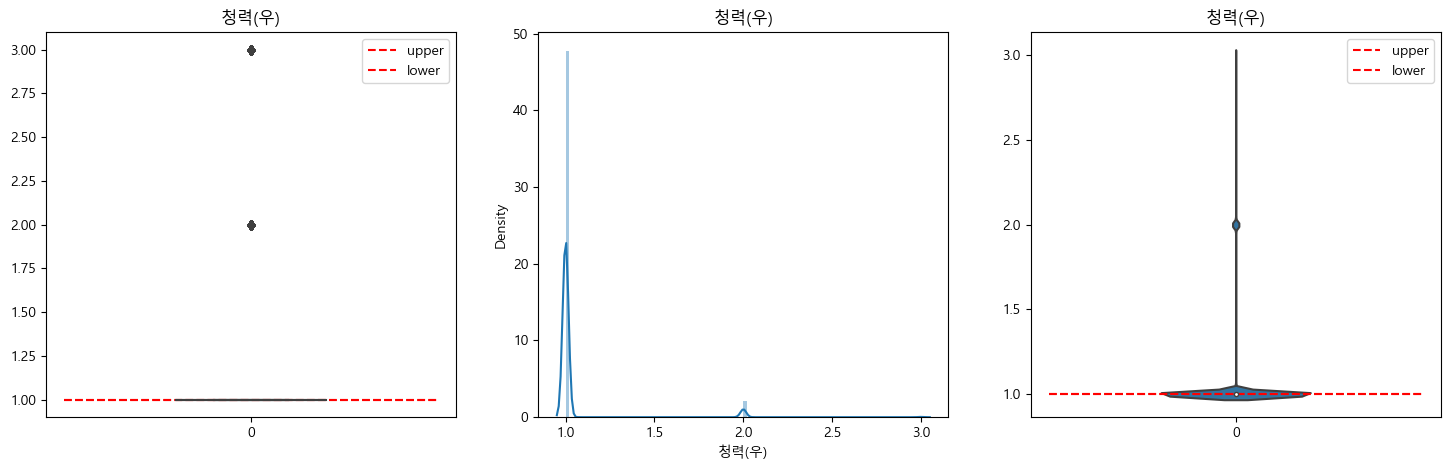

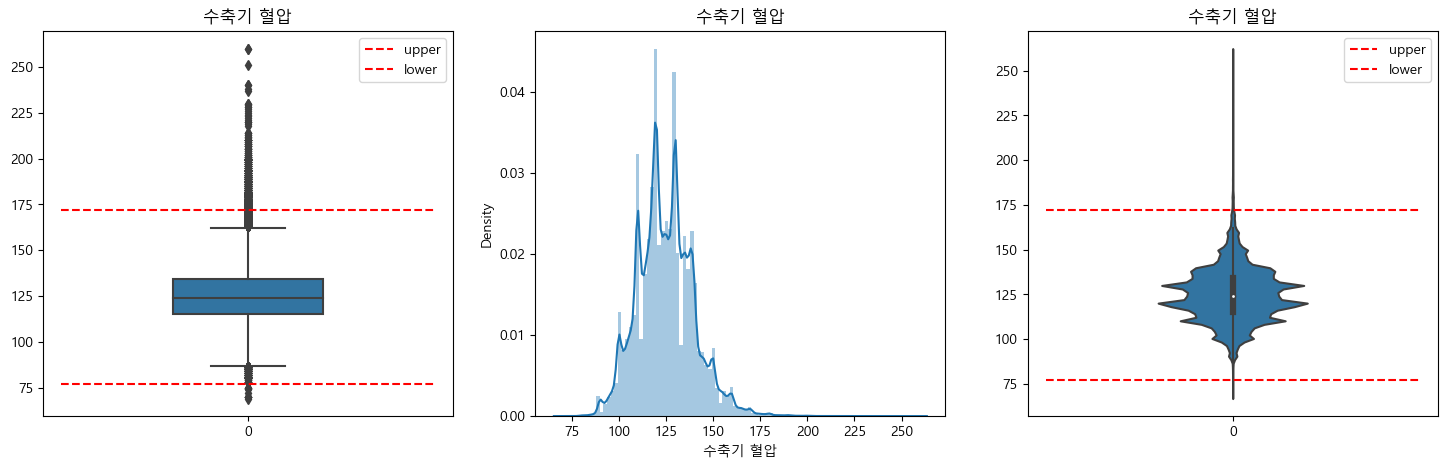

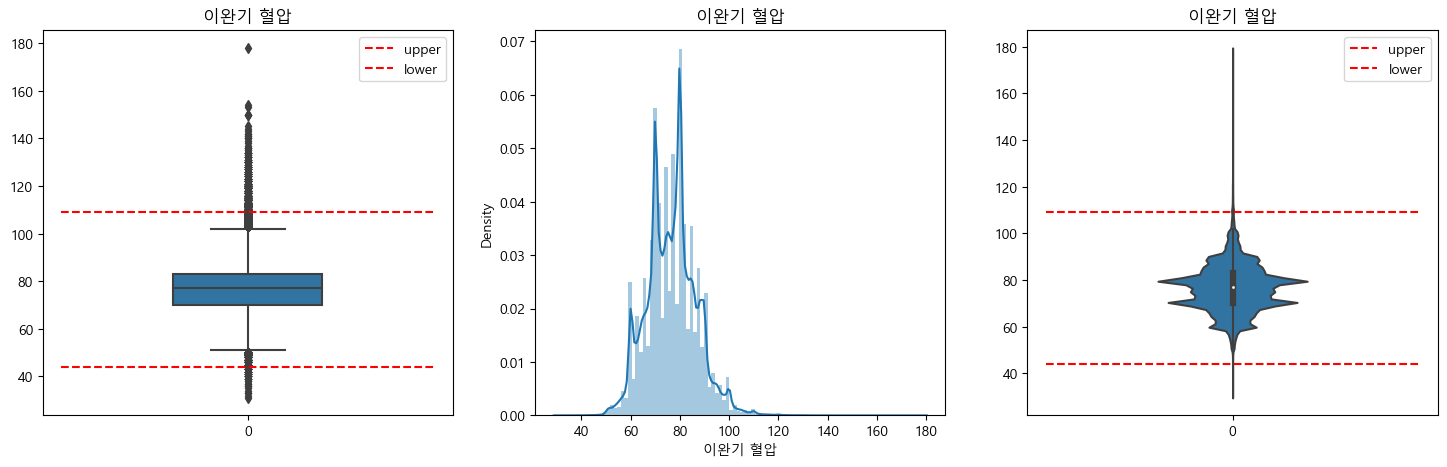

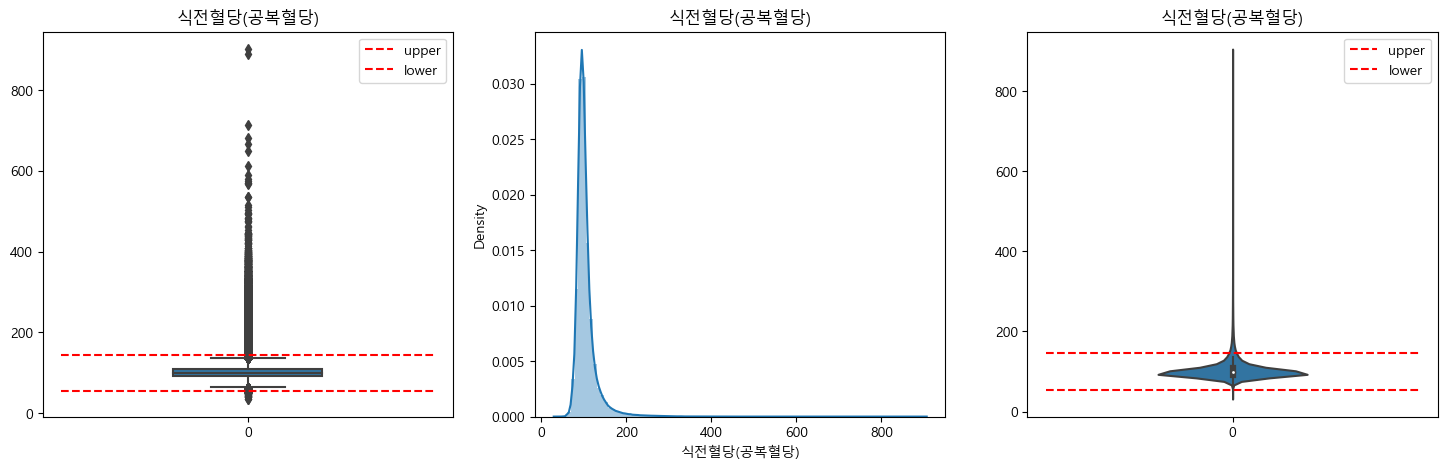

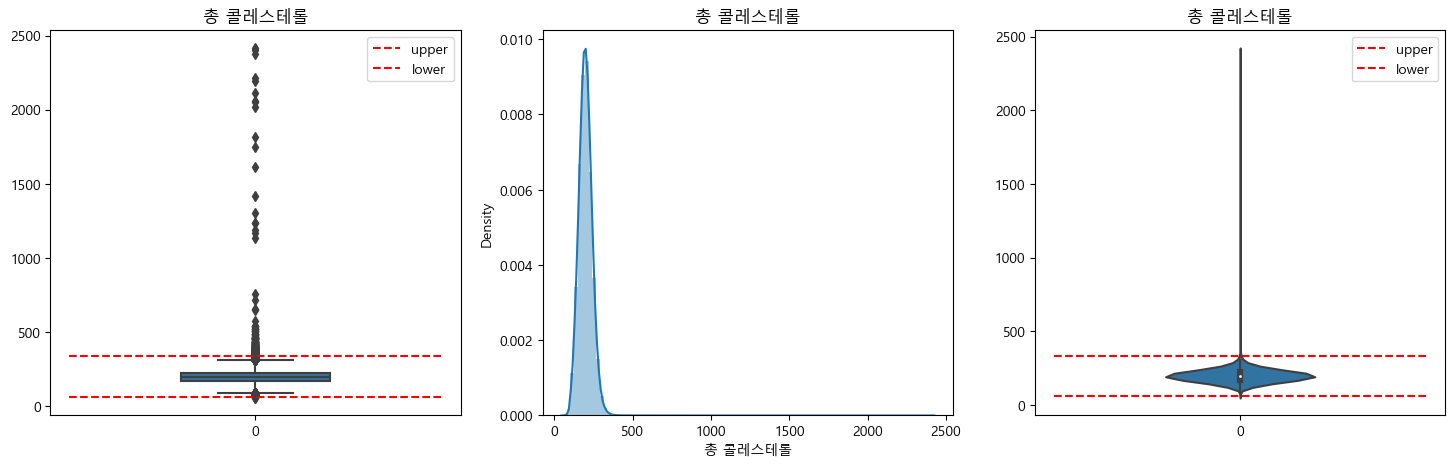

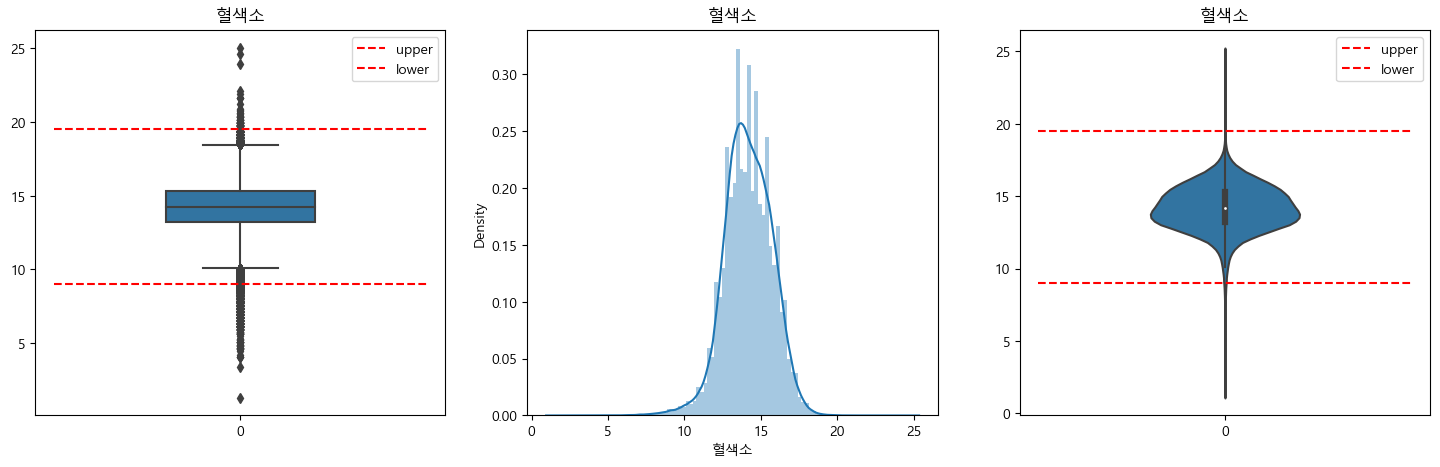

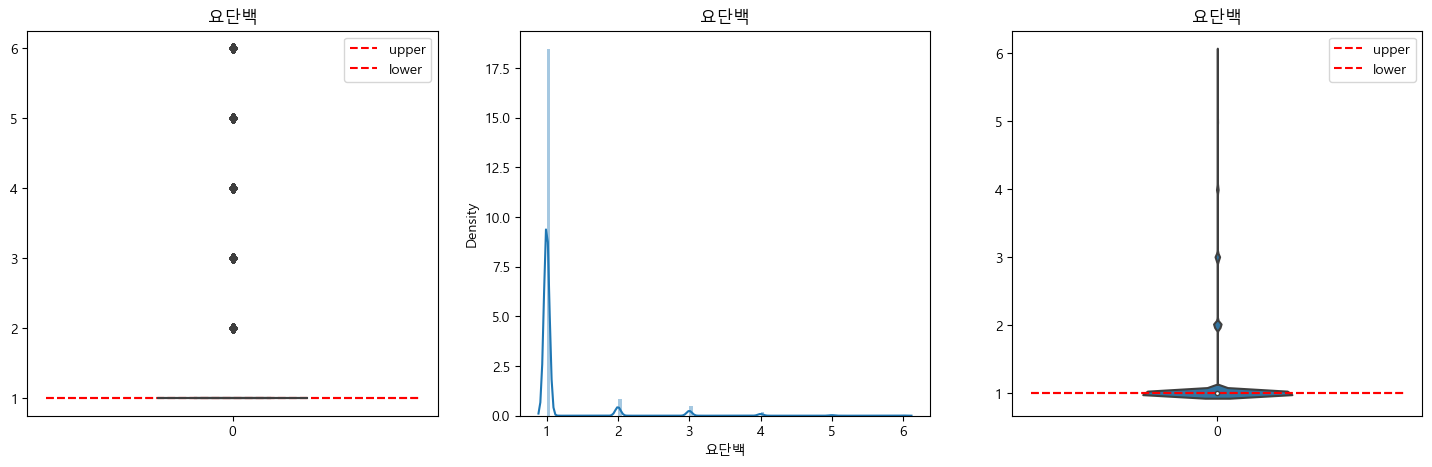

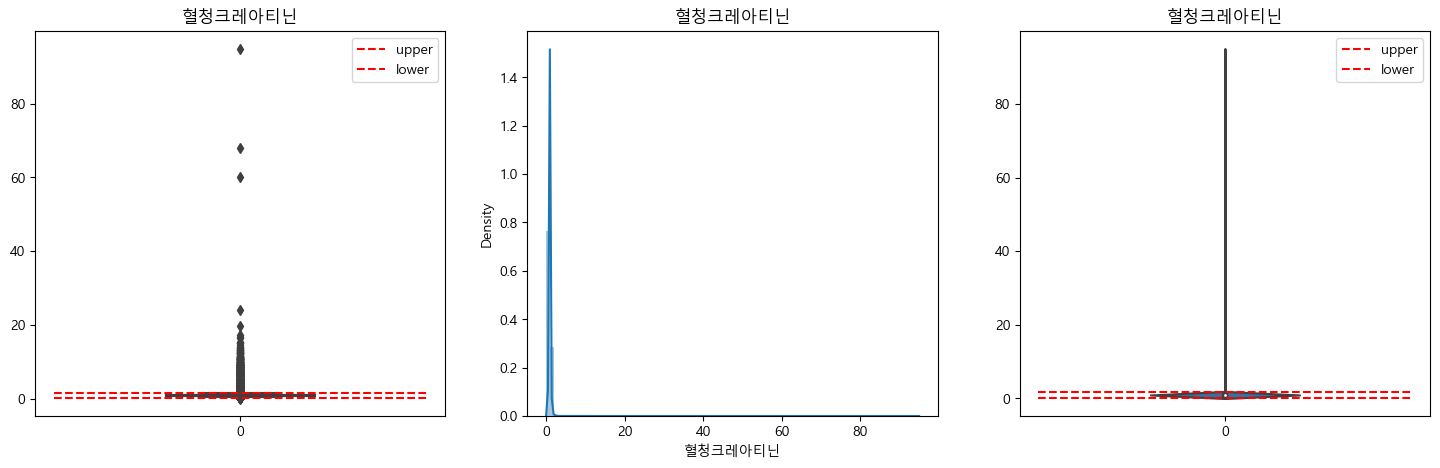

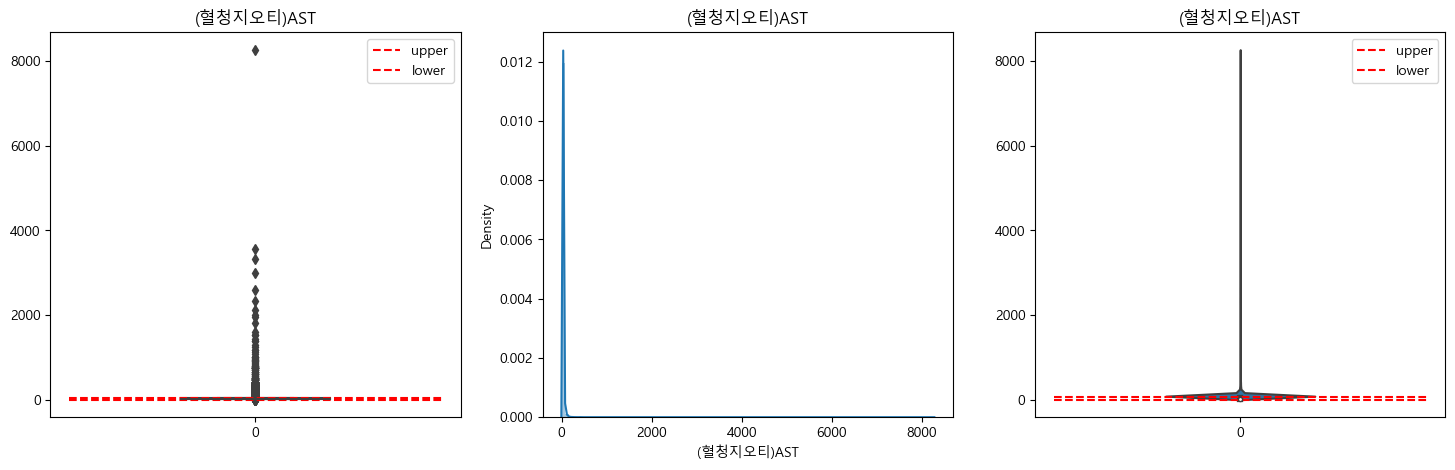

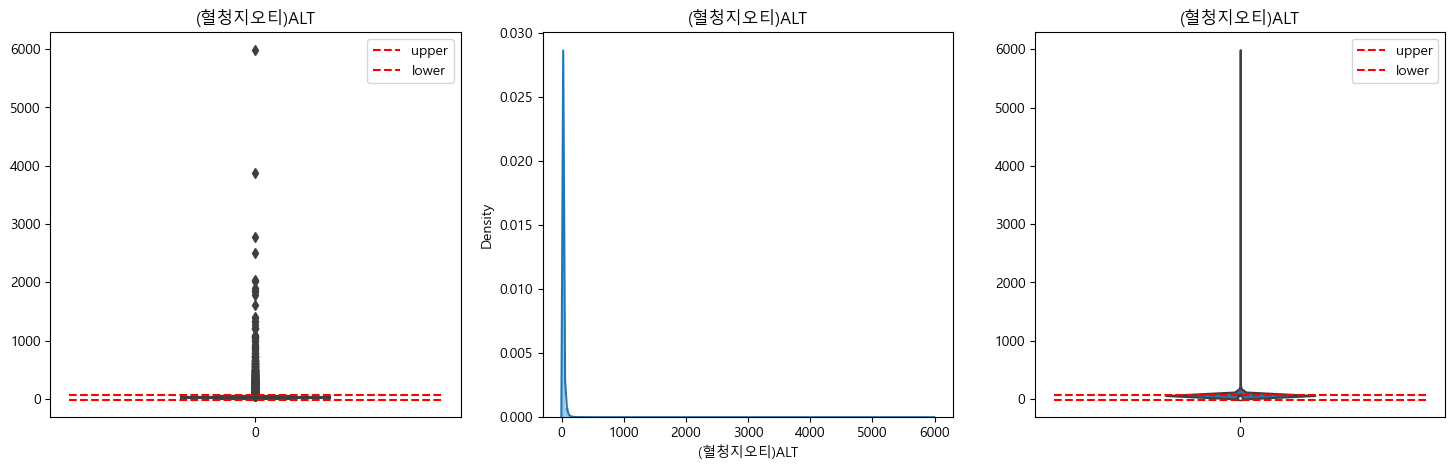

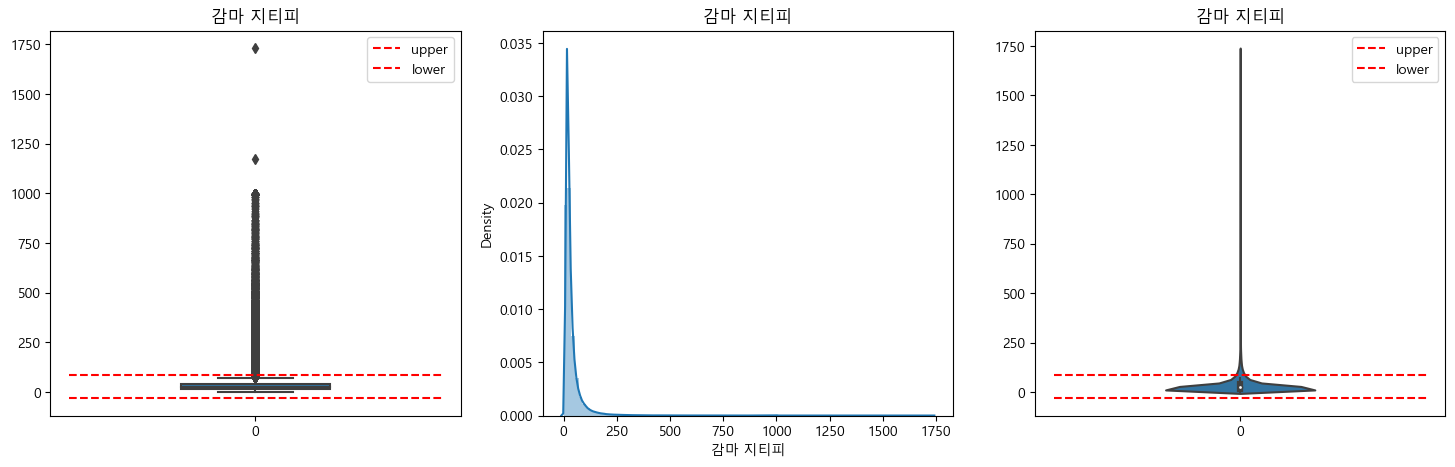

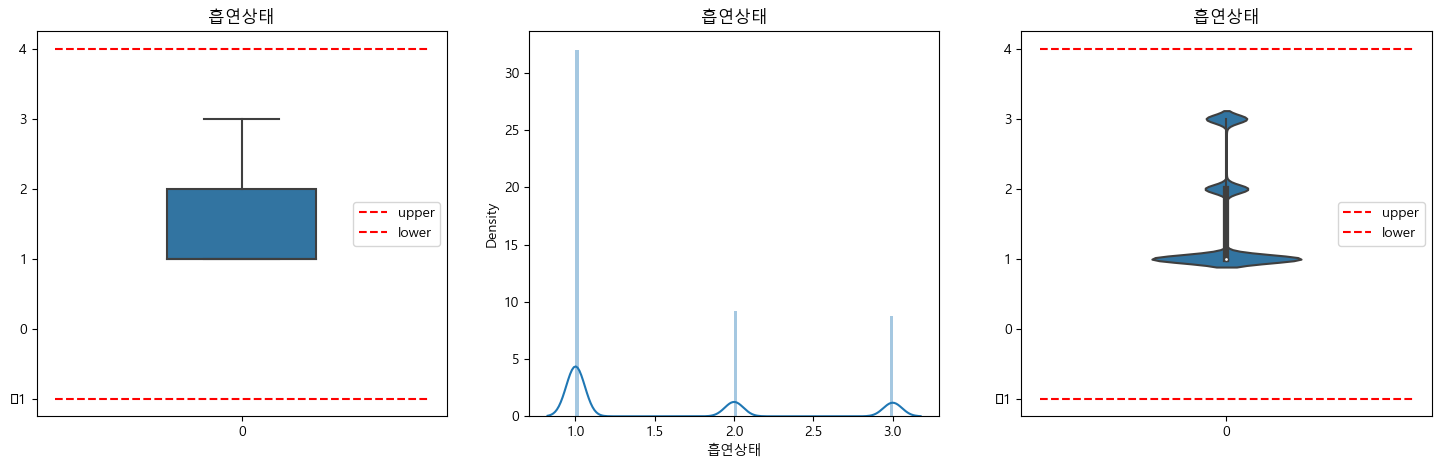

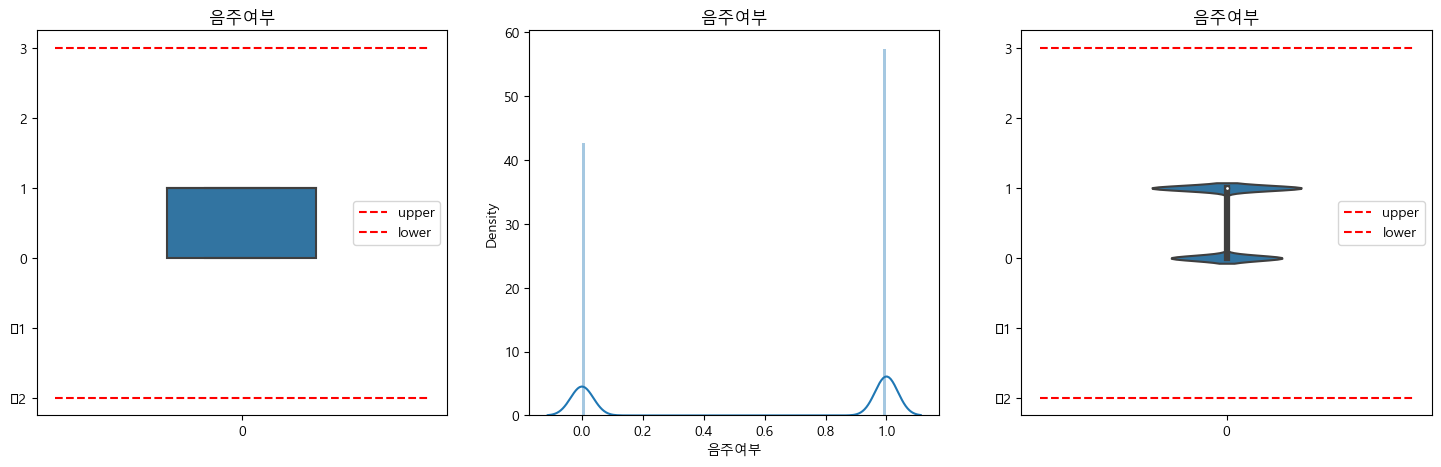

In [100]:
for col in df2.columns:
    iqr = df2[col].quantile(.75)-df2[col].quantile(.25)
    coef = 2.0
    u = df2[col].quantile(.75) + coef*iqr
    l = df2[col].quantile(.25) - coef*iqr

    plt.figure(figsize=(18,5))
    plt.title(col)
    plt.subplot(1,3,1)
    sns.boxplot(df2[col])
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.title(col)

    plt.subplot(1,3,2)
    sns.distplot(df2[col], bins = 100) 
    plt.title(col)

    plt.subplot(1,3,3)
    sns.violinplot(df2[col]) 
    plt.title(col)
    plt.plot([-1,1],[u,u],c = 'red', linestyle = '--', label = 'upper')
    plt.plot([-1,1],[l,l],c = 'red', linestyle = '--', label = 'lower')
    plt.legend()
    plt.show()


In [109]:
outlier_list = ['체중(5Kg 단위)', '허리둘레', '시력(좌)','총 콜레스테롤',
       '시력(우)','식전혈당(공복혈당)', '혈색소', '혈청크레아티닌',
       '(혈청지오티)AST','감마 지티피']

for col in outlier_list:
    iqr = df2[col].quantile(.75)-df2[col].quantile(.25)
    u = df2[col].quantile(.75) + 1.5*iqr
    l = df2[col].quantile(.25) - 1.5*iqr
    idx = df2[(df2[col] > u) | (df2[col] < l)].index
    df2 = df2.drop(index = idx)
df2 = df2.reset_index(drop = True)

df2 = df2.drop( index = df2[(df2['청력(우)'] > 2) | (df2['청력(좌)'] > 2)].index)

# OLS 검정

In [110]:
X = df2.drop(columns = ['(혈청지오티)ALT'])
y = df2['(혈청지오티)ALT']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42)


# 아웃라이어 제거했으므로 Robust가 아닌 MinMax 선택
scaler = MinMaxScaler()

for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))


model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                          9.336e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:56:50   Log-Likelihood:                      3.9991e+05
No. Observations:              168204   AIC:                                 -7.998e+05
Df Residuals:                  168184   BIC:                                 -7.996e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
성별코드            -0.0031      0.000    -20.083      0.000      -0.003      -0.003
연령대 코드(5세단위)    -0.0196      0.000    -65.621      0.000      -0.020      -0.019
신장(5Cm단위)       -0.0181      0.001    -30.534      0.000      -0.019      -0.017
체중(5Kg 단위)       0.0244      0.001     42.571      0.000       0.023       0.026
허리둘레             0.0097      0.001     17.805      0.000       0.009       0.011
시력(좌)            0.0009      0.000      2.662      0.008       0.000       0.002
시력(우)            0.0003      0.000      0.989      0.323      -0.000       0.001
청력(좌)           -0.0009      0.000     -2.844      0.004      -0.002      -0.000
청력(우)           -0.0007      0.000     -2.081      0.037      -0.001   -3.97e-05
수축기 혈압       -5.846e-05      0.001     -0.061      0.951      -0.002       0.002
이완기 혈압          -0.0052      0.001     -4.376      0.000      -0.008      -0.003
식전혈당(공복혈당)       0.0101      0.000     34.207      0.000       0.010       0.011
총 콜레스테롤         -0.0054      0.000    -17.511      0.000      -0.006      -0.005
혈색소              0.0218      0.000     53.969      0.000       0.021       0.023
요단백             -0.0017      0.001     -2.397      0.017      -0.003      -0.000
혈청크레아티닌         -0.0045      0.000    -15.195      0.000      -0.005      -0.004
(혈청지오티)AST       0.1002      0.000    321.216      0.000       0.100       0.101
감마 지티피           0.0305      0.000     96.153      0.000       0.030       0.031
흡연상태            -0.0025      0.000    -12.523      0.000      -0.003      -0.002
음주여부            -0.0044      0.000    -36.361      0.000      -0.005      -0.004
==============================================================================
Omnibus:                    82512.568   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4060097.087
Skew:                           1.626   Prob(JB):                         0.00
Kurtosis:                      26.848   Cond. No.                         50.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X = df2.drop(columns = ['(혈청지오티)ALT','시력(우)','수축기 혈압'])
y = df2['(혈청지오티)ALT']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42)


# 아웃라이어 제거했으므로 Robust가 아닌 MinMax 선택
scaler = MinMaxScaler()

for col in X.columns:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))


model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                          1.037e+05
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        12:58:53   Log-Likelihood:                      3.9991e+05
No. Observations:              168204   AIC:                                 -7.998e+05
Df Residuals:                  168186   BIC:                                 -7.996e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
성별코드            -0.0031      0.000    -20.087      0.000      -0.003      -0.003
연령대 코드(5세단위)    -0.0196      0.000    -68.556      0.000      -0.020      -0.019
신장(5Cm단위)       -0.0181      0.001    -30.615      0.000      -0.019      -0.017
체중(5Kg 단위)       0.0244      0.001     42.601      0.000       0.023       0.025
허리둘레             0.0097      0.001     17.831      0.000       0.009       0.011
시력(좌)            0.0011      0.000      4.111      0.000       0.001       0.002
청력(좌)           -0.0009      0.000     -2.852      0.004      -0.002      -0.000
청력(우)           -0.0007      0.000     -2.083      0.037      -0.001   -4.01e-05
이완기 혈압          -0.0052      0.001     -6.320      0.000      -0.007      -0.004
식전혈당(공복혈당)       0.0101      0.000     34.286      0.000       0.010       0.011
총 콜레스테롤         -0.0054      0.000    -17.493      0.000      -0.006      -0.005
혈색소              0.0218      0.000     54.076      0.000       0.021       0.023
요단백             -0.0017      0.001     -2.403      0.016      -0.003      -0.000
혈청크레아티닌         -0.0045      0.000    -15.178      0.000      -0.005      -0.004
(혈청지오티)AST       0.1002      0.000    321.318      0.000       0.100       0.101
감마 지티피           0.0305      0.000     96.176      0.000       0.030       0.031
흡연상태            -0.0025      0.000    -12.525      0.000      -0.003      -0.002
음주여부            -0.0044      0.000    -36.350      0.000      -0.005      -0.004
==============================================================================
Omnibus:                    82503.962   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4058977.236
Skew:                           1.626   Prob(JB):                         0.00
Kurtosis:                      26.845   Cond. No.                         28.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:  ', mean_squared_error(y_test, model.predict(X_test)))
print('RMSE: ', sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('MAE:  ', mean_absolute_error(y_test, model.predict(X_test)))

MSE:   0.0004802286942706384
RMSE:  0.02191412088746976
MAE:   0.015822640037689437


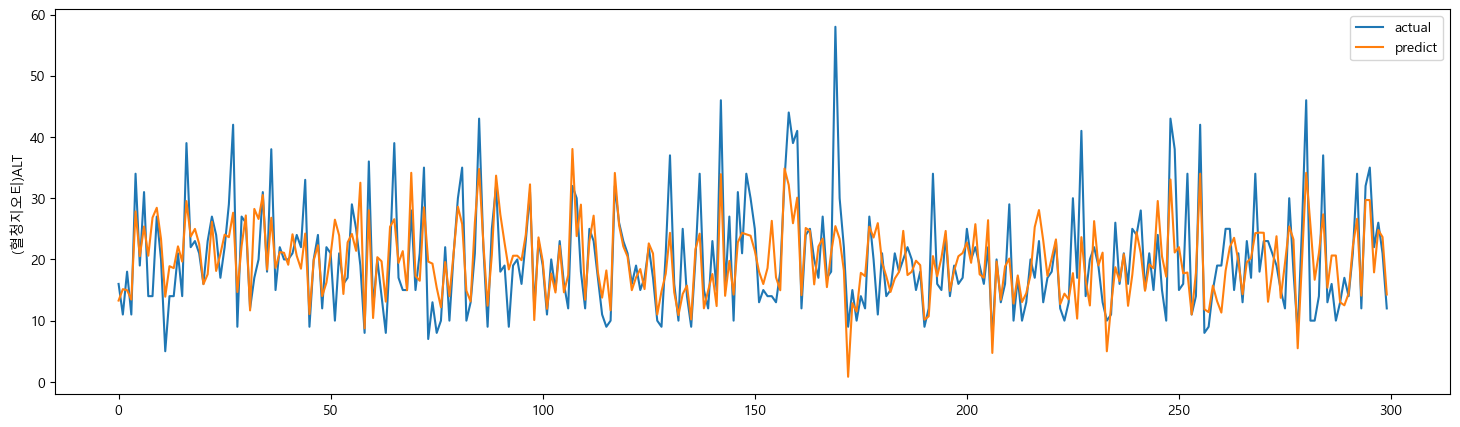

In [114]:
actual = scaler.inverse_transform(y_test)
predict = scaler.inverse_transform(np.array(model.predict(X_test)).reshape(-1,1))
plt.figure(figsize = (18,5))
plt.plot(actual[:300], label = 'actual')
plt.plot(predict[:300], label = 'predict')
plt.ylabel('(혈청지오티)ALT')
plt.legend()
plt.show()

# 해석

가설검정은 pass

### 모델 성능 향상
- RMSE, MAE가 약 50%감소

### Feature 요단백
- 요단백의 회귀계수가 유의하게 나타났음

# 결론
> #### 정보 손실을 경계하며 모델 성능을 높일 방법을 생각해야함


1. 모델 성능을 높이는 것이 목적이라면, 결측치가 있는 행를 제거할 것인지 결측치가 많은 열을 제거할 것인지 모델 성능을 보고 비교해야함
2. 추세를 예측하는 것은 경우의 수 1이 더 나음 (신뢰구간이 0을 포함하는 변수가 없기 때문)
3. 이상치를 어느정도까지 제거할 지 모델 성능을 보고 판단해야함
4. 목적에 맞지않는 (혈청 ALT에 영향을 주지 않는 컬럼 제거 필요)
5. 다중공선성은 회귀분석에 큰 영향을 미치므로 확인 필요

> ##### 추후 다른 모델 적용 필요